In [2]:
import numpy as np
import csv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import sys
import os

# 添加自定义路径
custom_path = os.path.abspath("../script")
if custom_path not in sys.path:
    sys.path.append(custom_path)

from loggoing_tools import *

In [3]:
data_list={
        "retention":["MixTank_High",	"MixTank_Low","PT3_Level"],	
        "LeakDetector":["LeakDetector"],	
        "Flow":["PT1_Pressure","PT2_Pressure","FT1_Flow"],
        "skid_water_quality":["QC1_Conductivity","QC2_Conductivity"],
        "detector_level":["UT1_Depth","LT1_Level","PT5_Depth"] ,
        "detector_water_quality":["Salinity","TDS","UT1_Conductivity"] ,
        "Temperature":["QC1_Temperature","UT1_Temperature","QC2_Temperature"],                         				
}
class_list = {"time":str,
        "pump_status":bool,	
        "retention":float,	
        "LeakDetector":bool,	
        "Flow":float,
        "skid_water_quality":float,
        "detector_level":float ,
        "detector_water_quality":float ,
        "Temperature":float,
        "Alarm":int                           				
}

In [4]:
columns_dict = read_csv_to_dict('../data/merged.csv')

for key, value in columns_dict.items():
    print(f"{key}: {value[:3]}") 

Date: ['03-10-2024' '03-10-2024' '03-10-2024']
Time: ['17:09:38' '17:09:39' '17:09:40']
Pump_A_Sel_Auto: [1. 1. 1.]
Pump_A_Sel_Man: [0. 0. 0.]
Pump_B_Sel_Auto: [0. 0. 0.]
Pump_B_Sel_Man: [0. 0. 0.]
Pump_A_In_OL: [0 0 0]
Pump_B_In_OL: [0 0 0]
Pump_A_Motor: [0 0 0]
Pump_B_Motor: [0 0 0]
MixTank_High: [0 0 0]
MixTank_Low: [0 0 0]
LeakDetector: [0 0 0]
RemovalTank_High: [0 0 0]
PT1_Pressure: [1. 1. 1.]
QC1_Conductivity: [1. 1. 1.]
QC2_Conductivity: [0. 0. 0.]
FT1_Flow: [0. 0. 0.]
PT2_Pressure: [1.94601 1.94678 1.94513]
UT1_Depth: [2.60895 2.60873 2.60895]
LT1_Level: [3.85798 3.85798 3.85798]
PT3_Level: [1.34616 1.34678 1.34678]
QC1_Temperature: [0.0883969 0.0876563 0.0879031]
PT5_Depth: [0.126696 0.125618 0.126696]
Salinity: [nan nan nan]
TDS: [nan nan nan]
UT1_Conductivity: [nan nan nan]
UT1_Temperature: [nan nan nan]
Fault_Register: [nan nan nan]
Fault_Register_2: [nan nan nan]
Down_Sampled_FT1: [nan nan nan]
QC2_Temperature: [nan nan nan]


In [5]:
seconds_from_start =np.array(calculate_seconds(columns_dict["Date"],columns_dict["Time"]))

In [6]:
time_and_date=[]

for date_str, time_str in zip(columns_dict["Date"],columns_dict["Time"]):
        # "HH:MM:SS DD-MM-YYYY"
        combined_str = f"{time_str} {date_str}"
        time_and_date.append(combined_str)
time_and_date = np.array(time_and_date)
time_and_date

array(['17:09:38 03-10-2024', '17:09:39 03-10-2024',
       '17:09:40 03-10-2024', ..., '09:53:47 27-11-2024',
       '09:53:48 27-11-2024', '09:53:49 27-11-2024'], dtype='<U19')

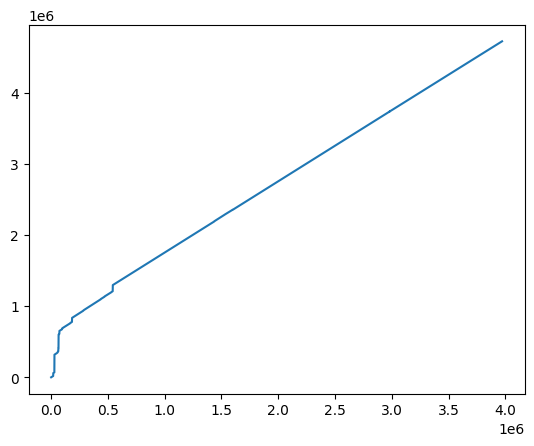

In [7]:
plt.plot(seconds_from_start)

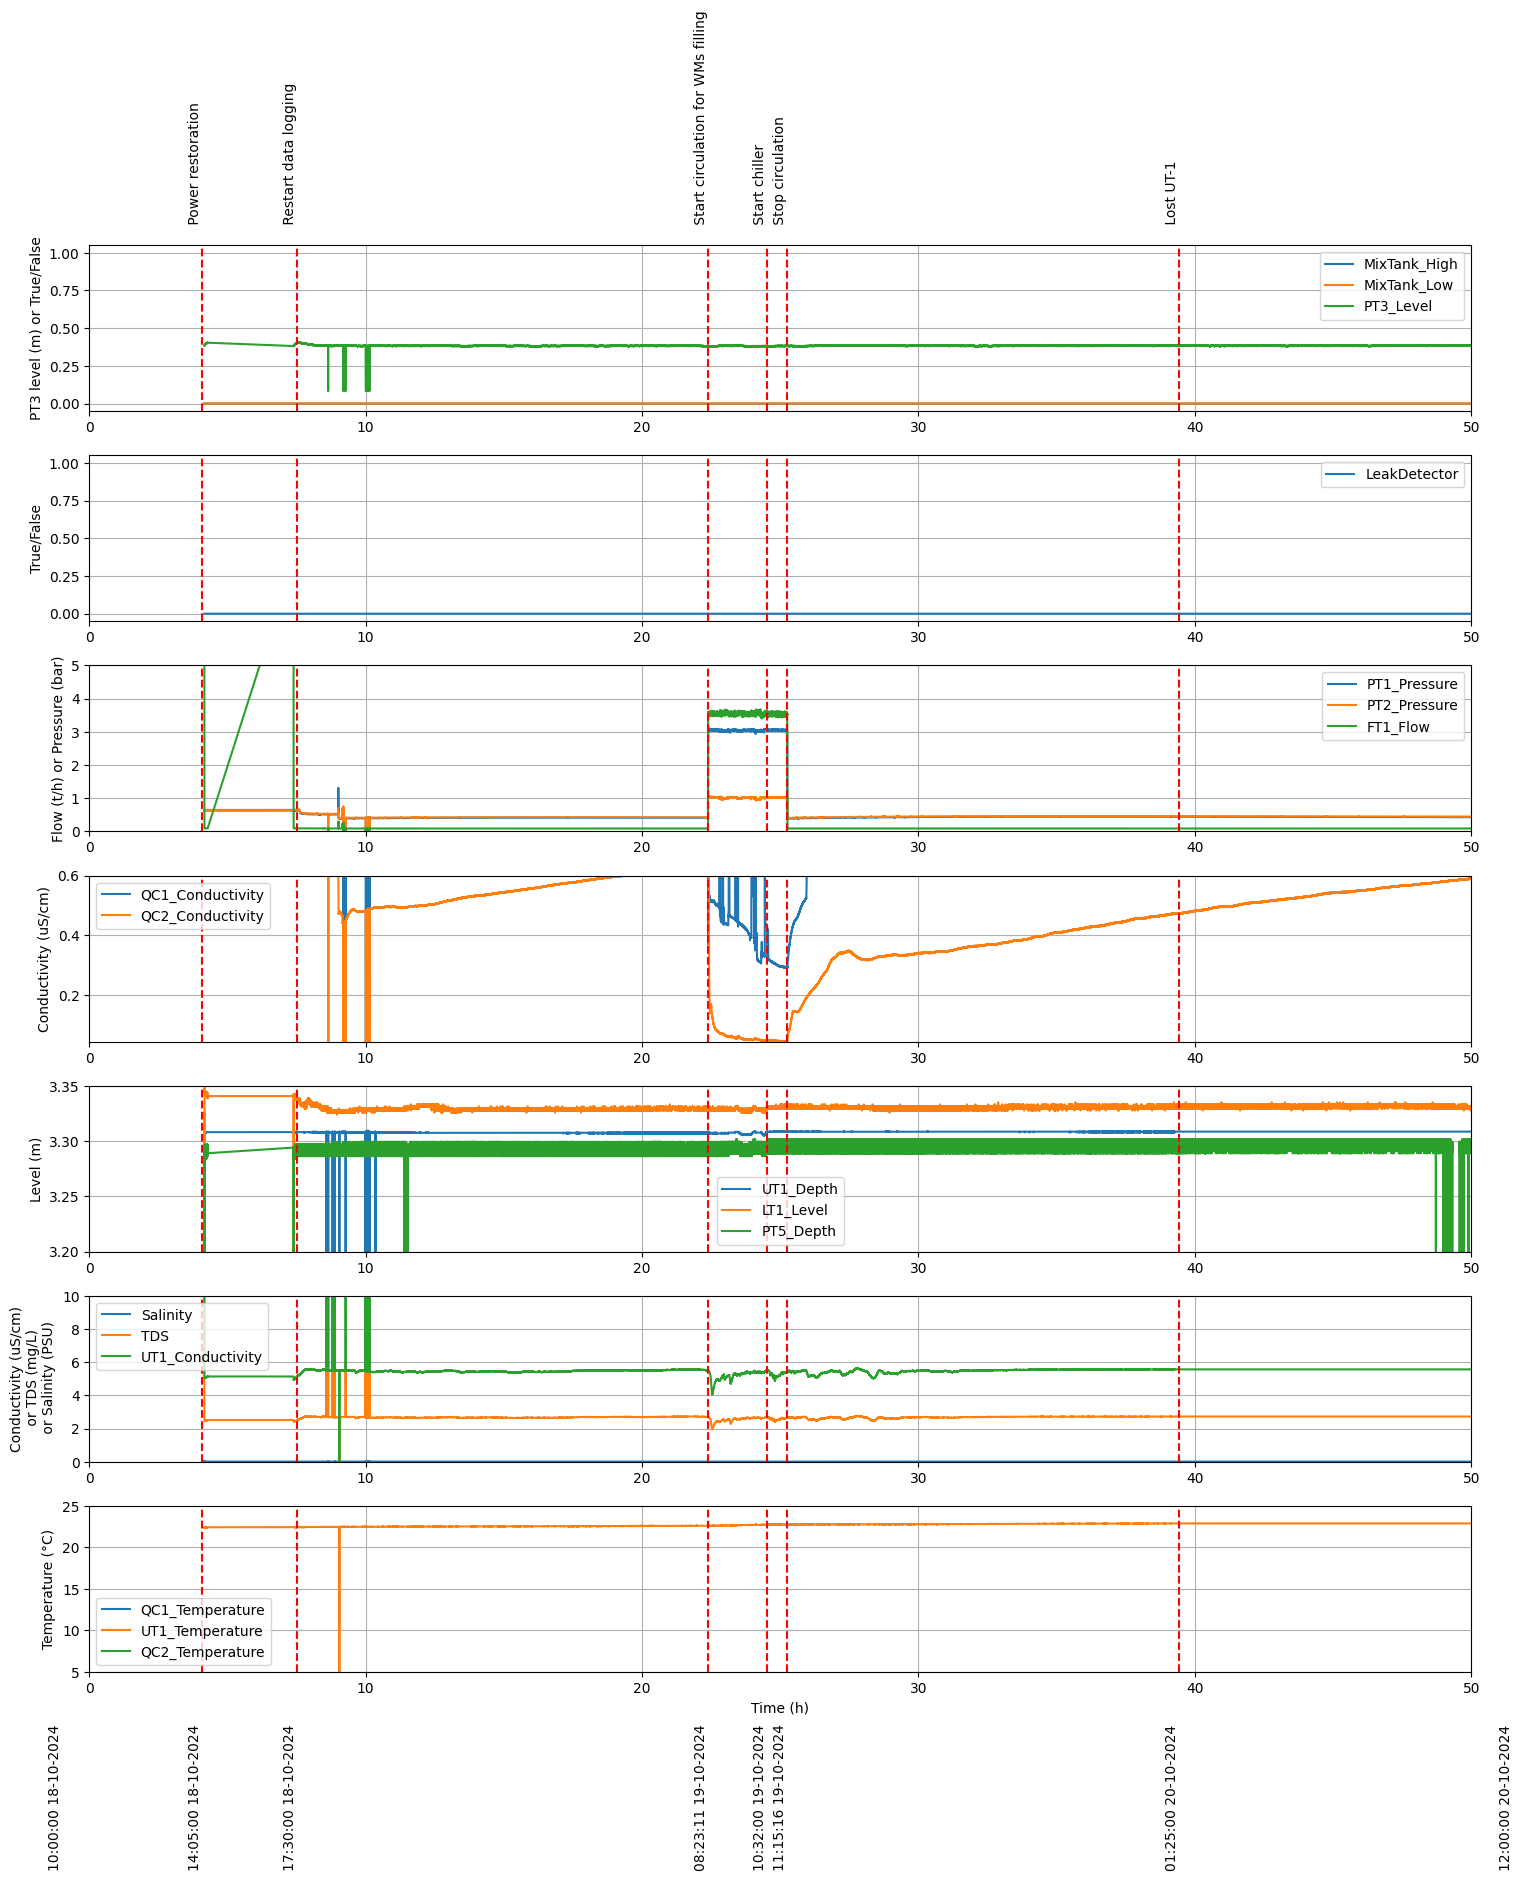

In [8]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.6],[3.2,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,["10:00:00", "12:00:00"],["18-10-2024","20-10-2024"],seconds_from_start,value_range,event_list)

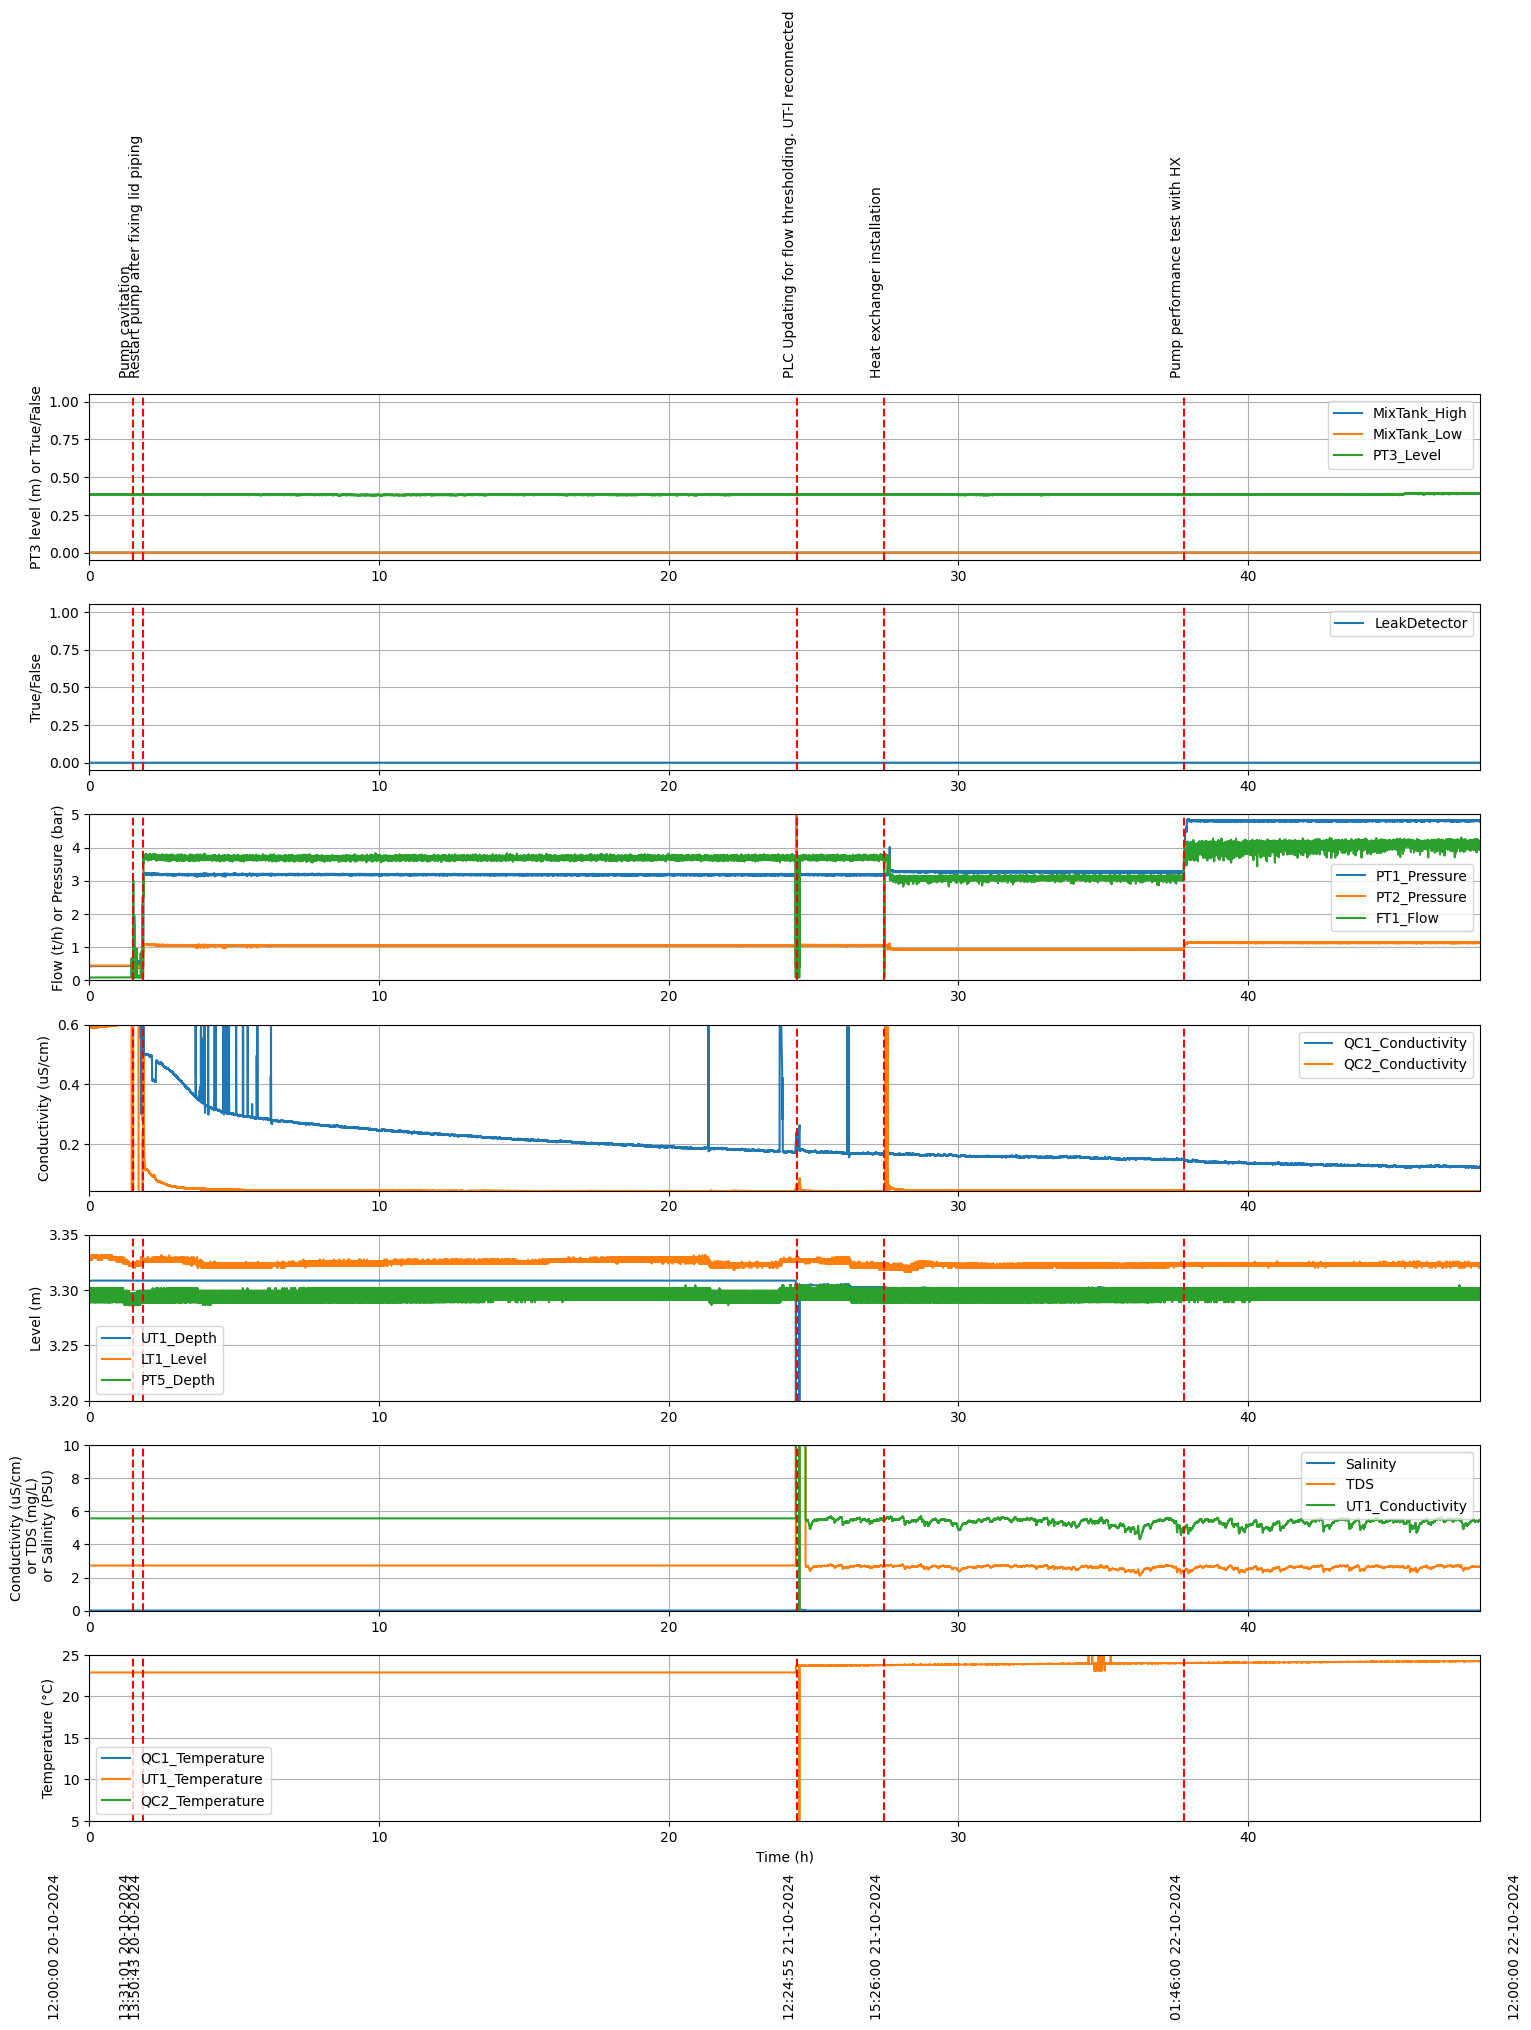

In [9]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.6],[3.2,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,["12:00:00","12:00:00"],["20-10-2024","22-10-2024"],seconds_from_start,value_range,event_list)

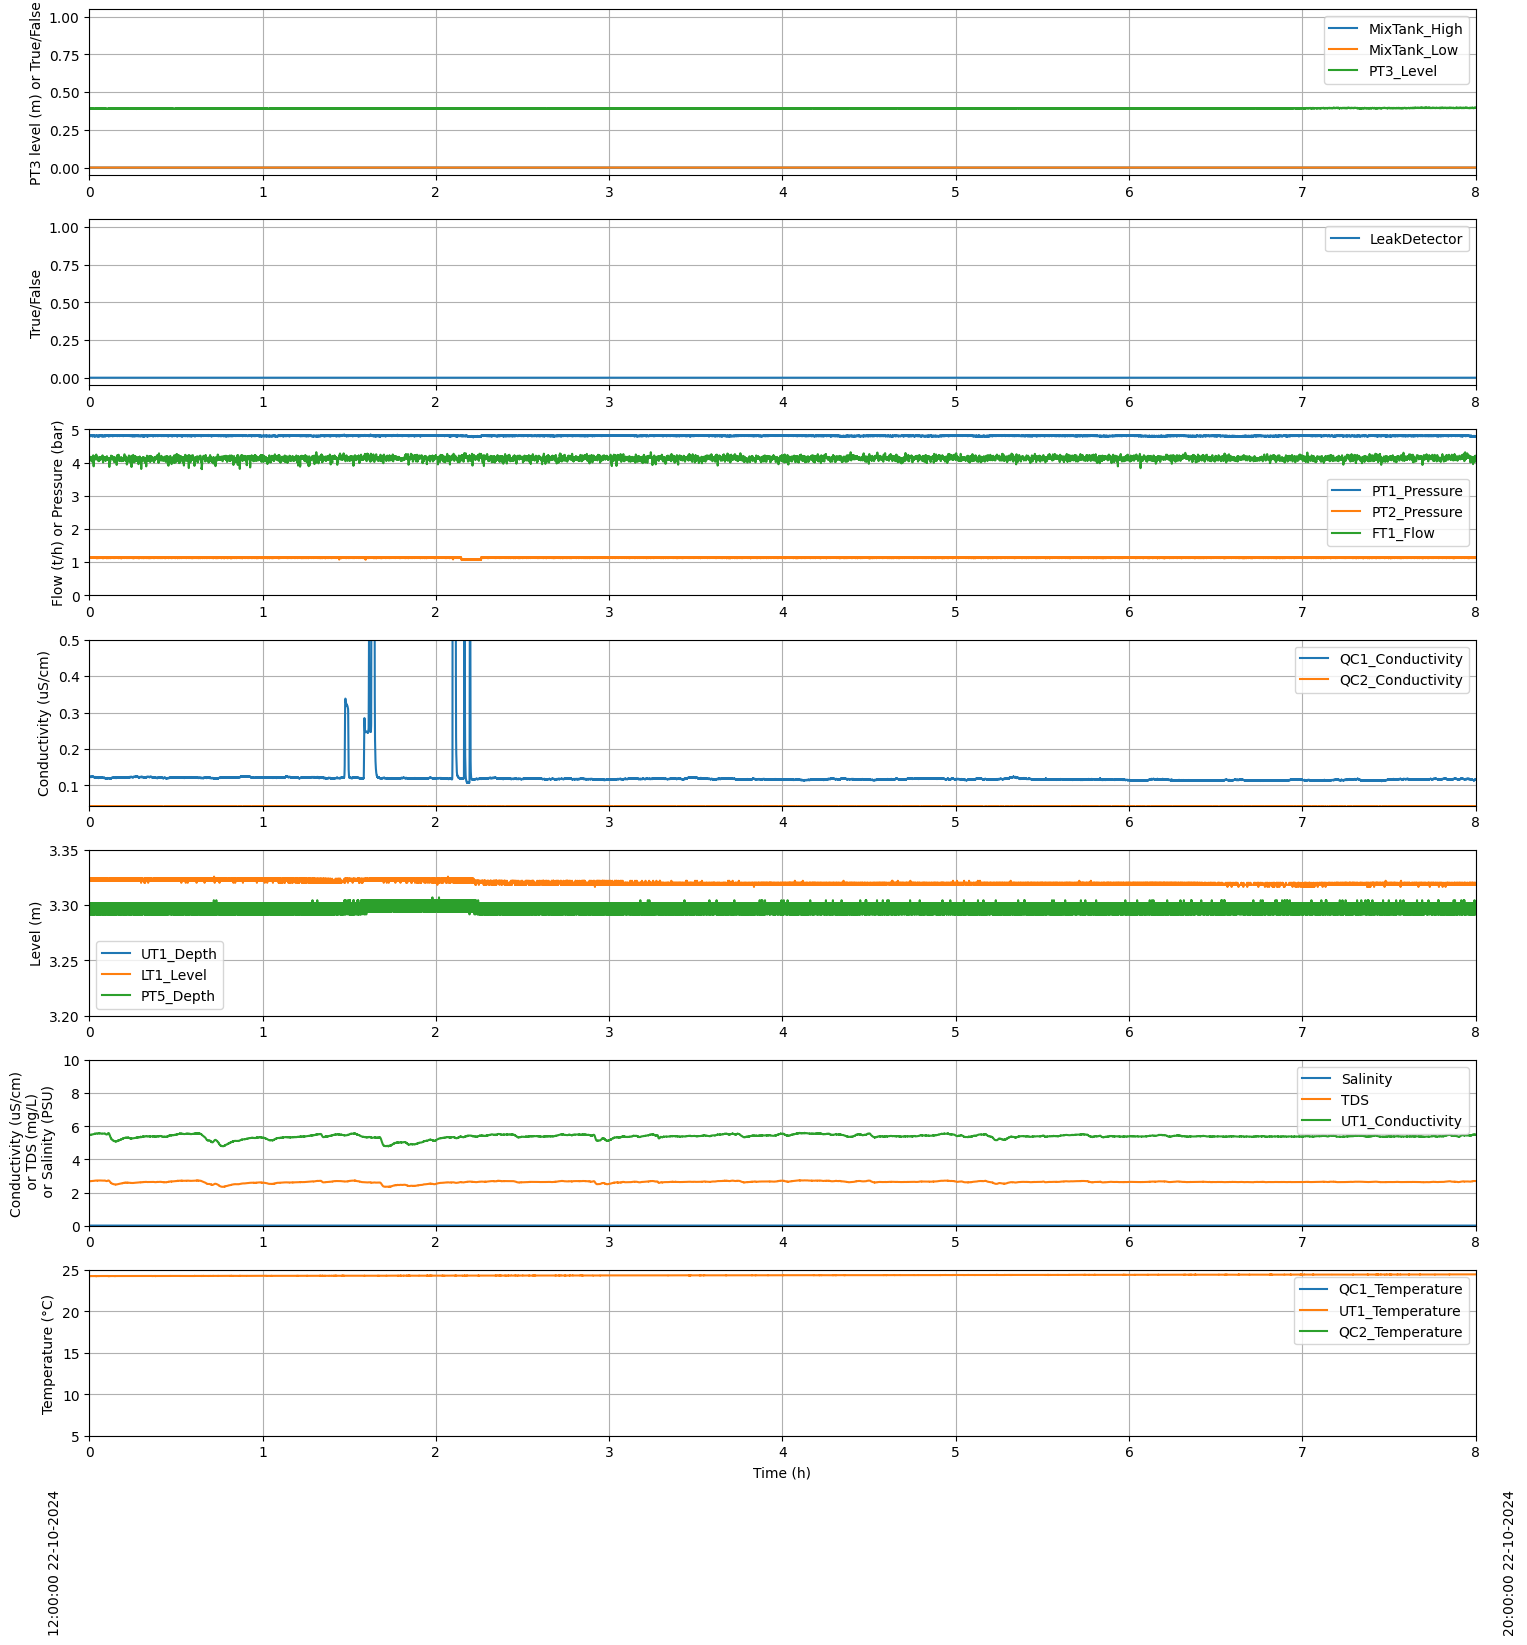

In [10]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,["12:00:00","20:00:00"],["22-10-2024","22-10-2024"],seconds_from_start,value_range,event_list)

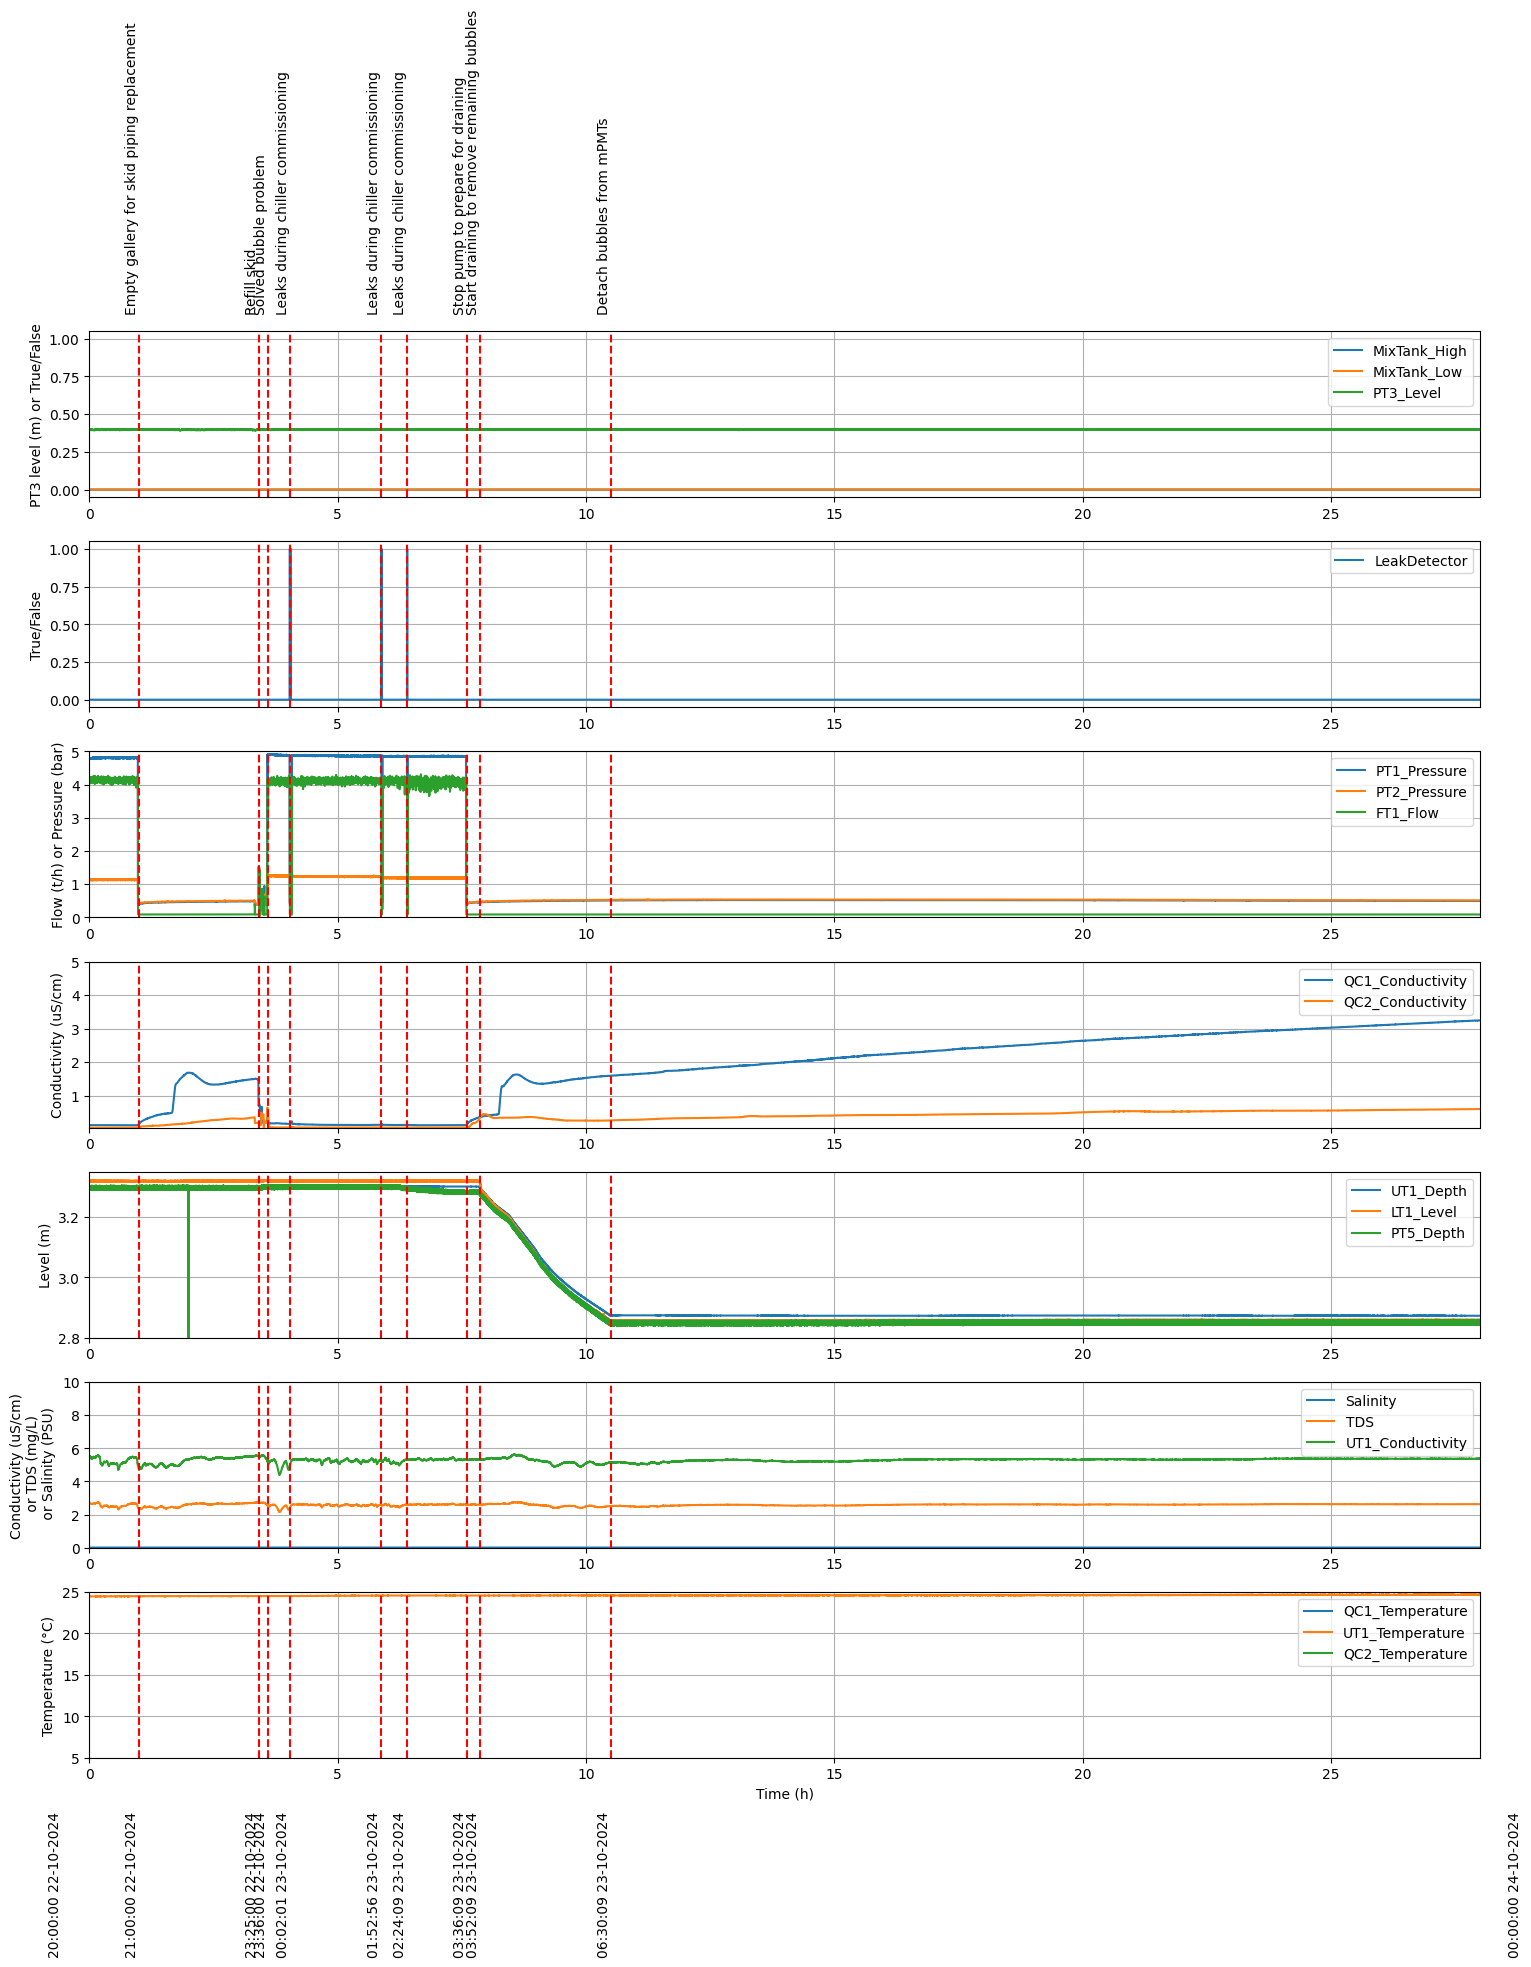

In [11]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,5],[2.8,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,[ "20:00:00","00:00:00"],["22-10-2024","24-10-2024"],seconds_from_start,value_range,event_list)

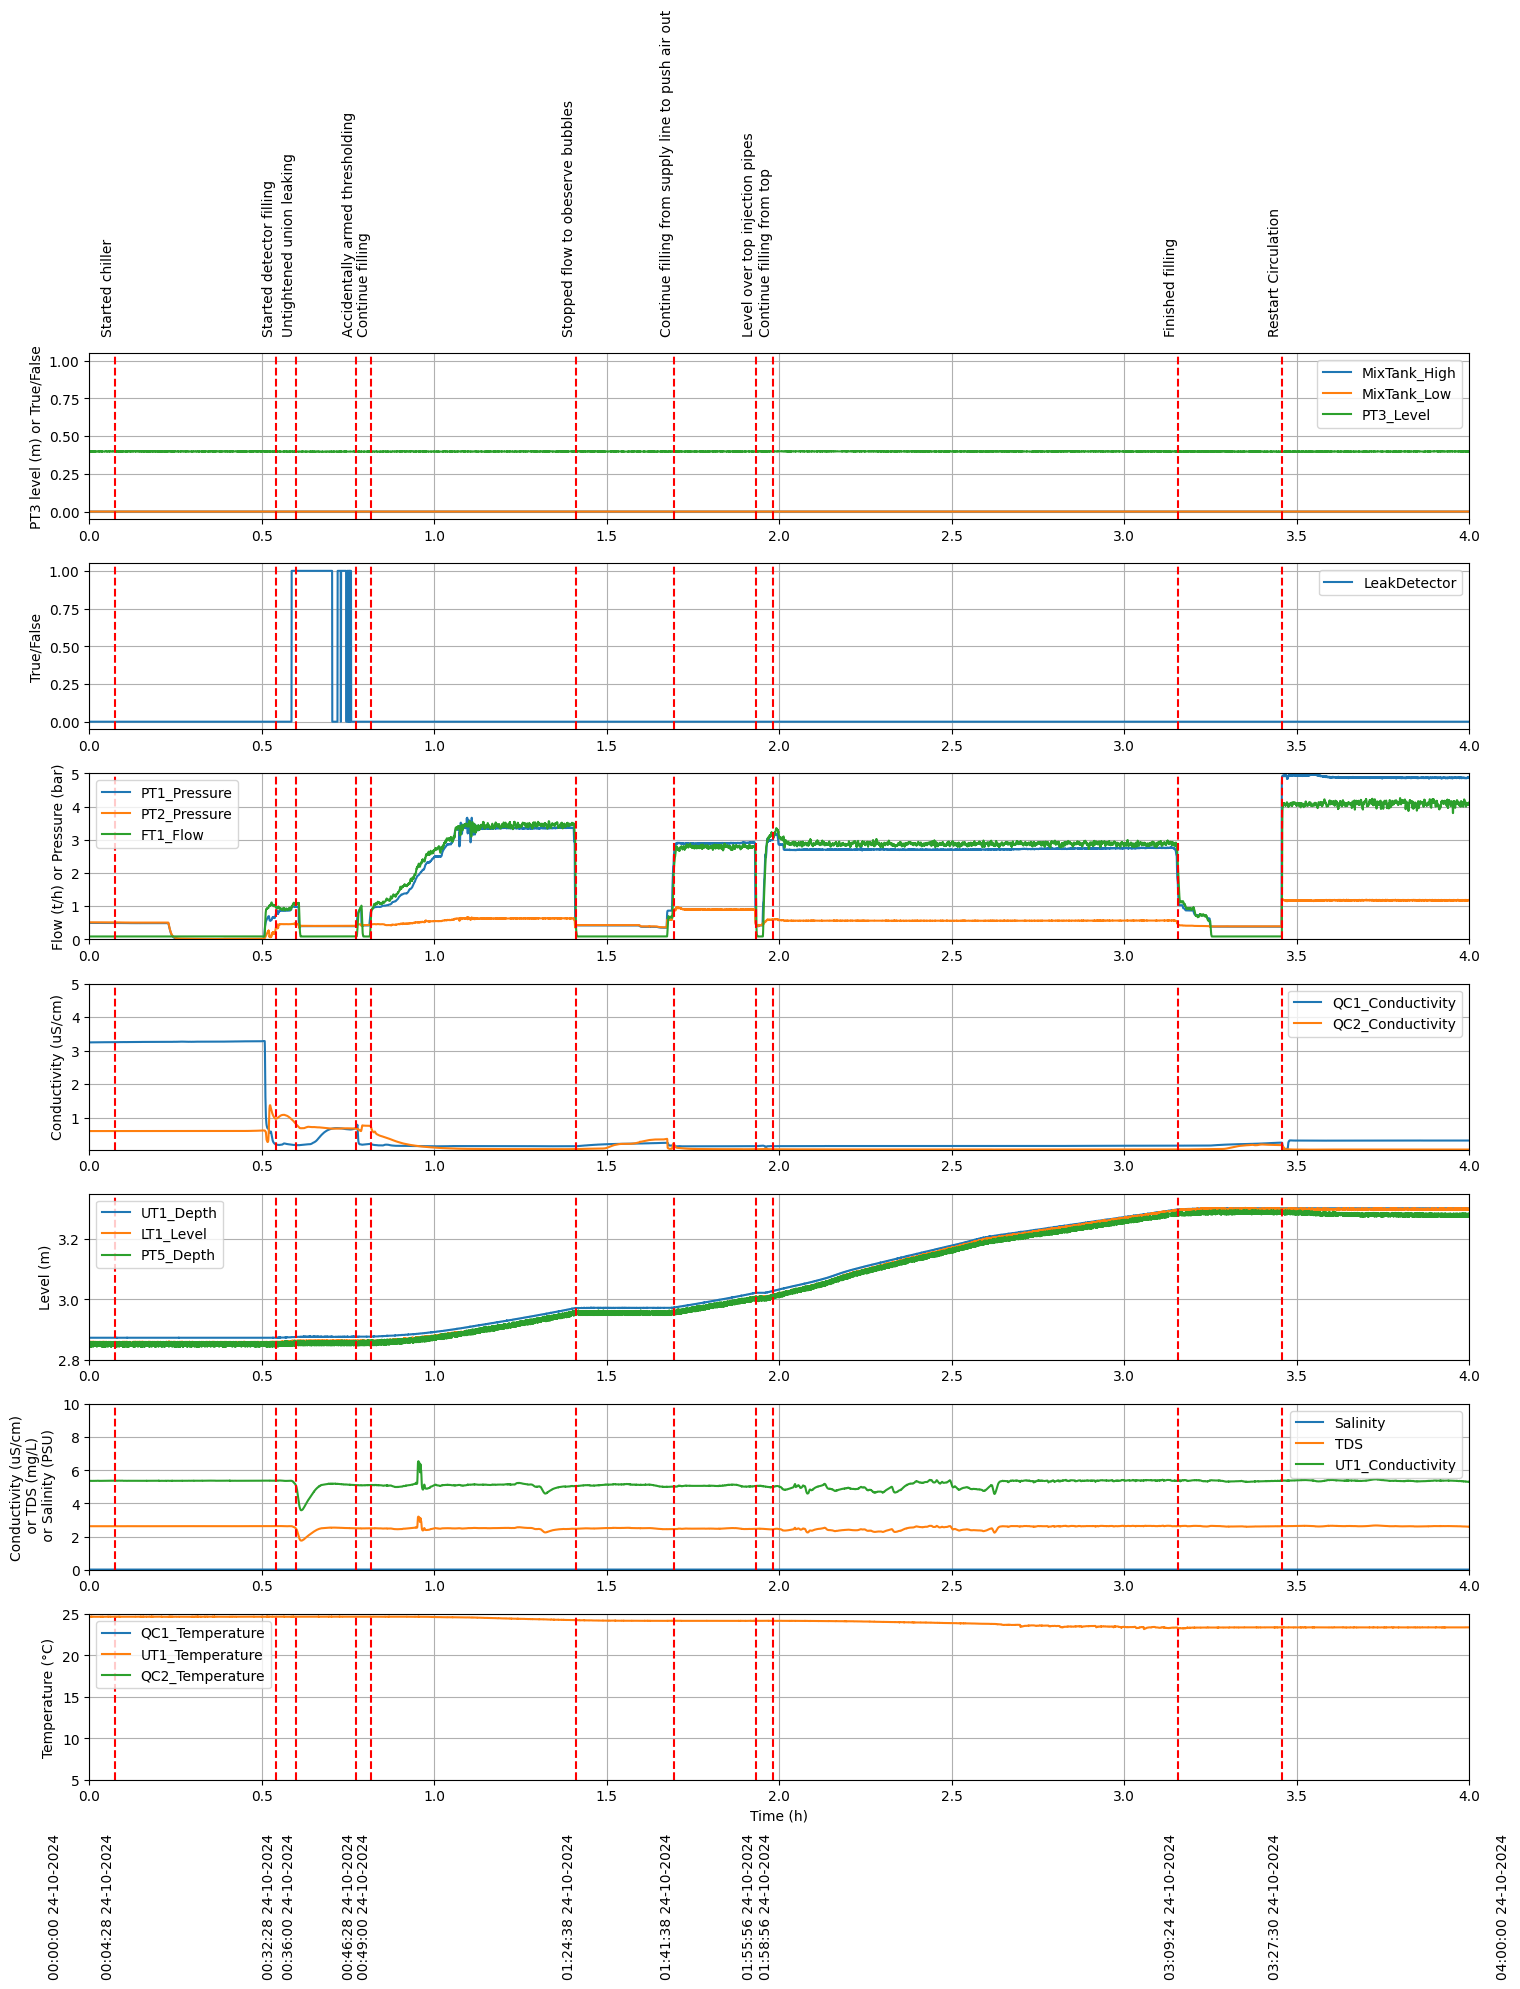

In [12]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,5],[2.8,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,[ "00:00:00","04:00:00"],["24-10-2024","24-10-2024"],seconds_from_start,value_range,event_list)

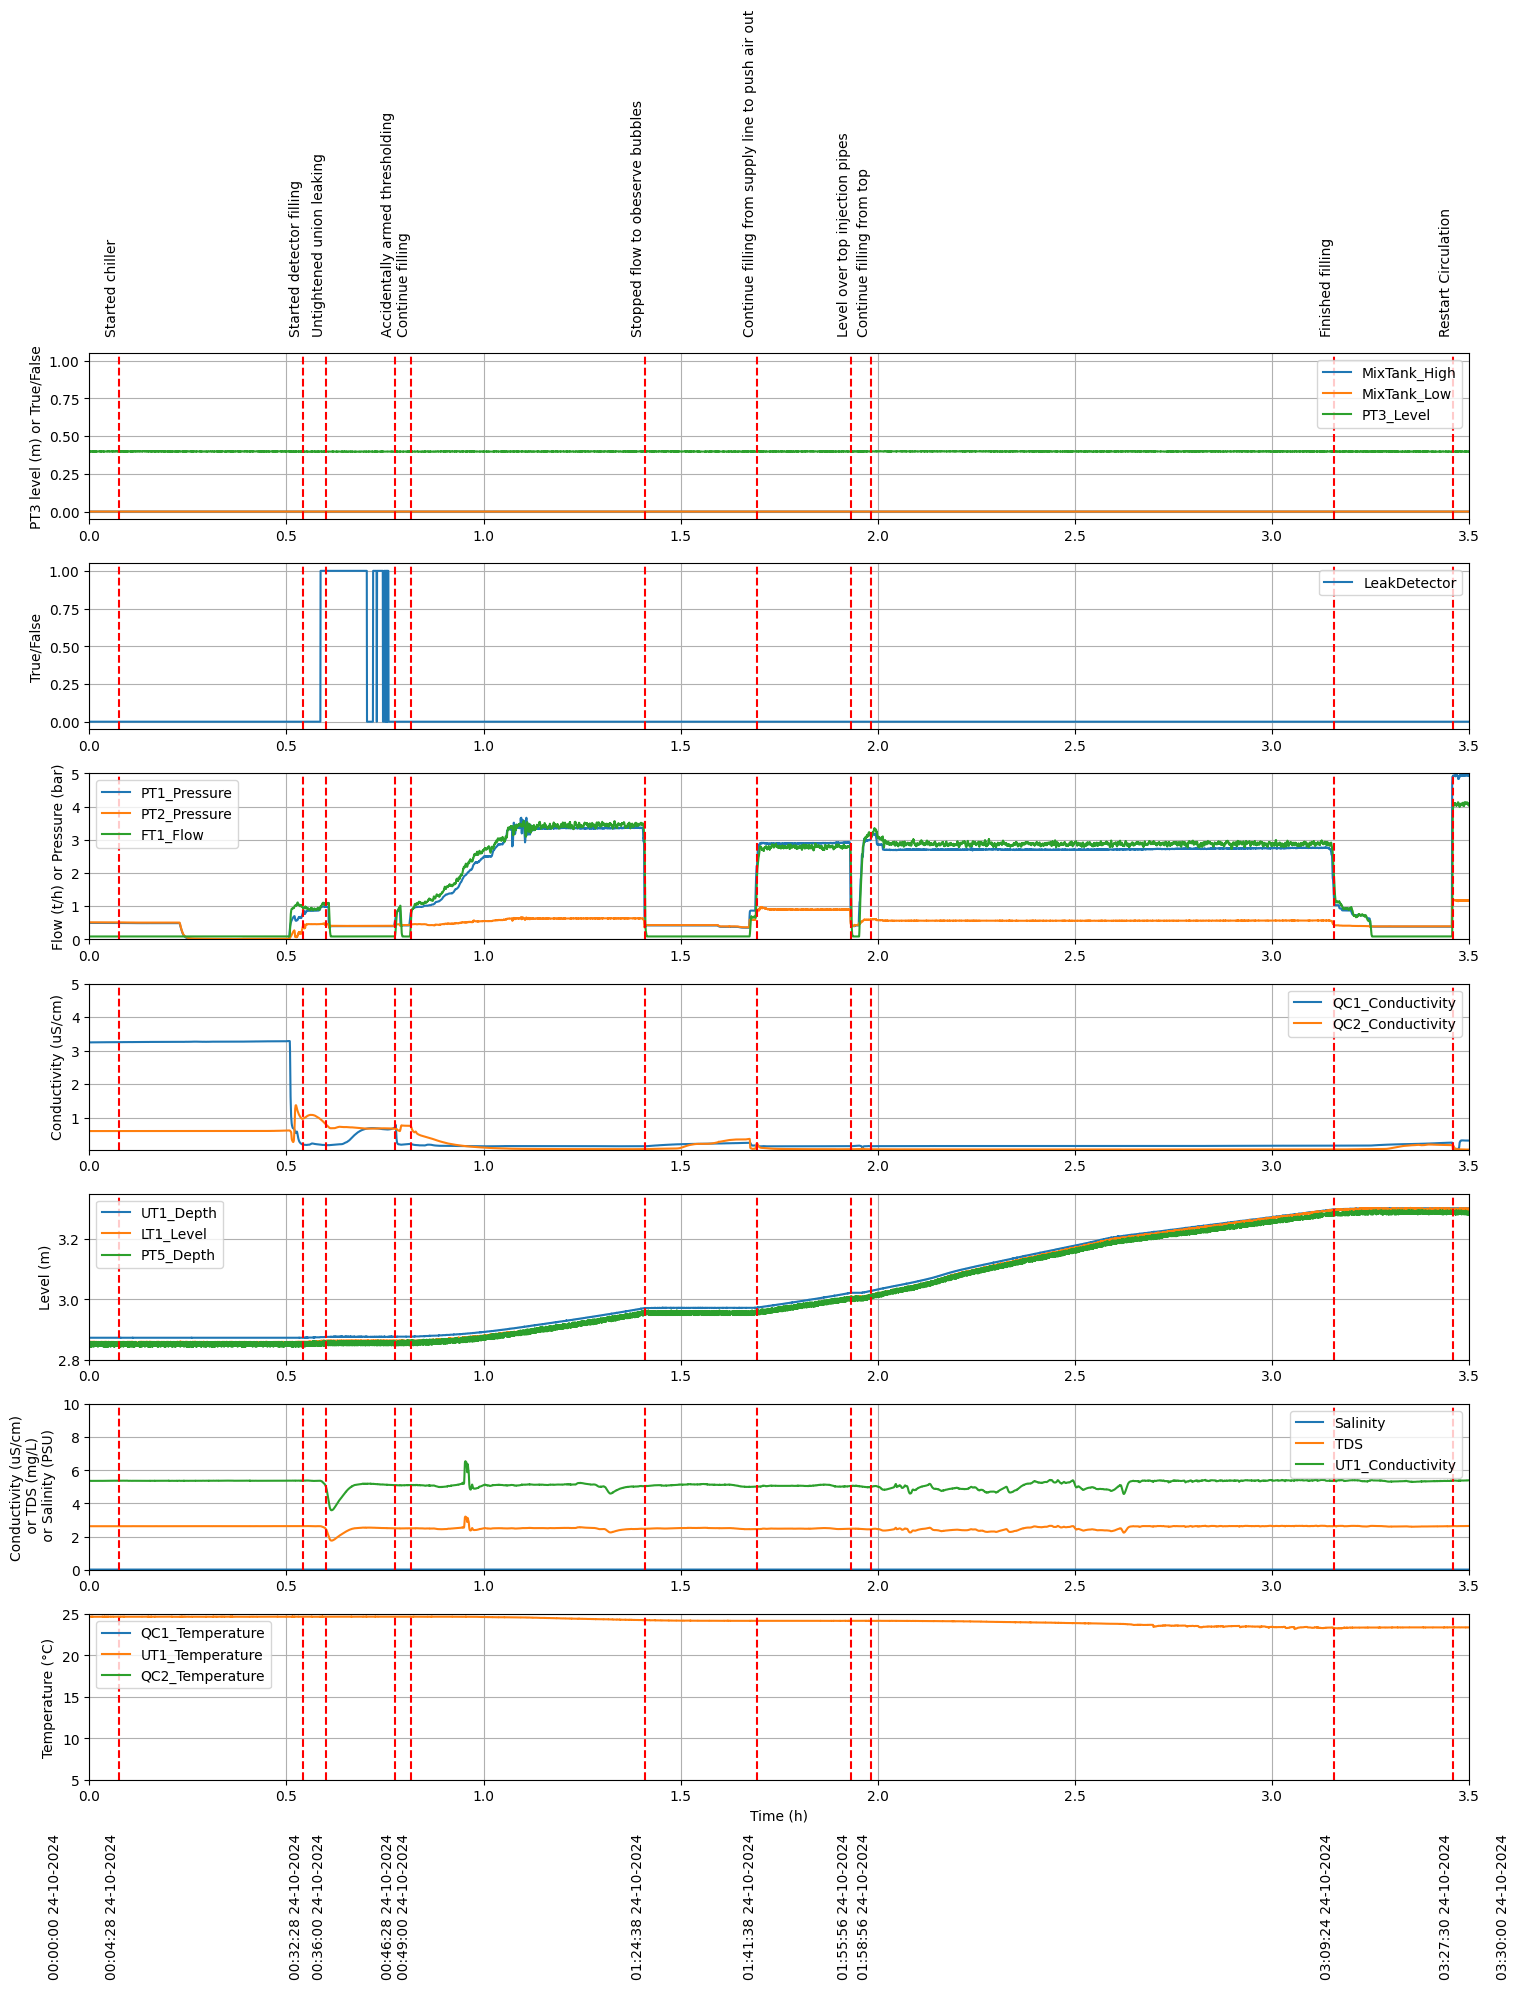

In [13]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,5],[2.8,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,[ "00:00:00","03:30:00"],["24-10-2024","24-10-2024"],seconds_from_start,value_range,event_list)

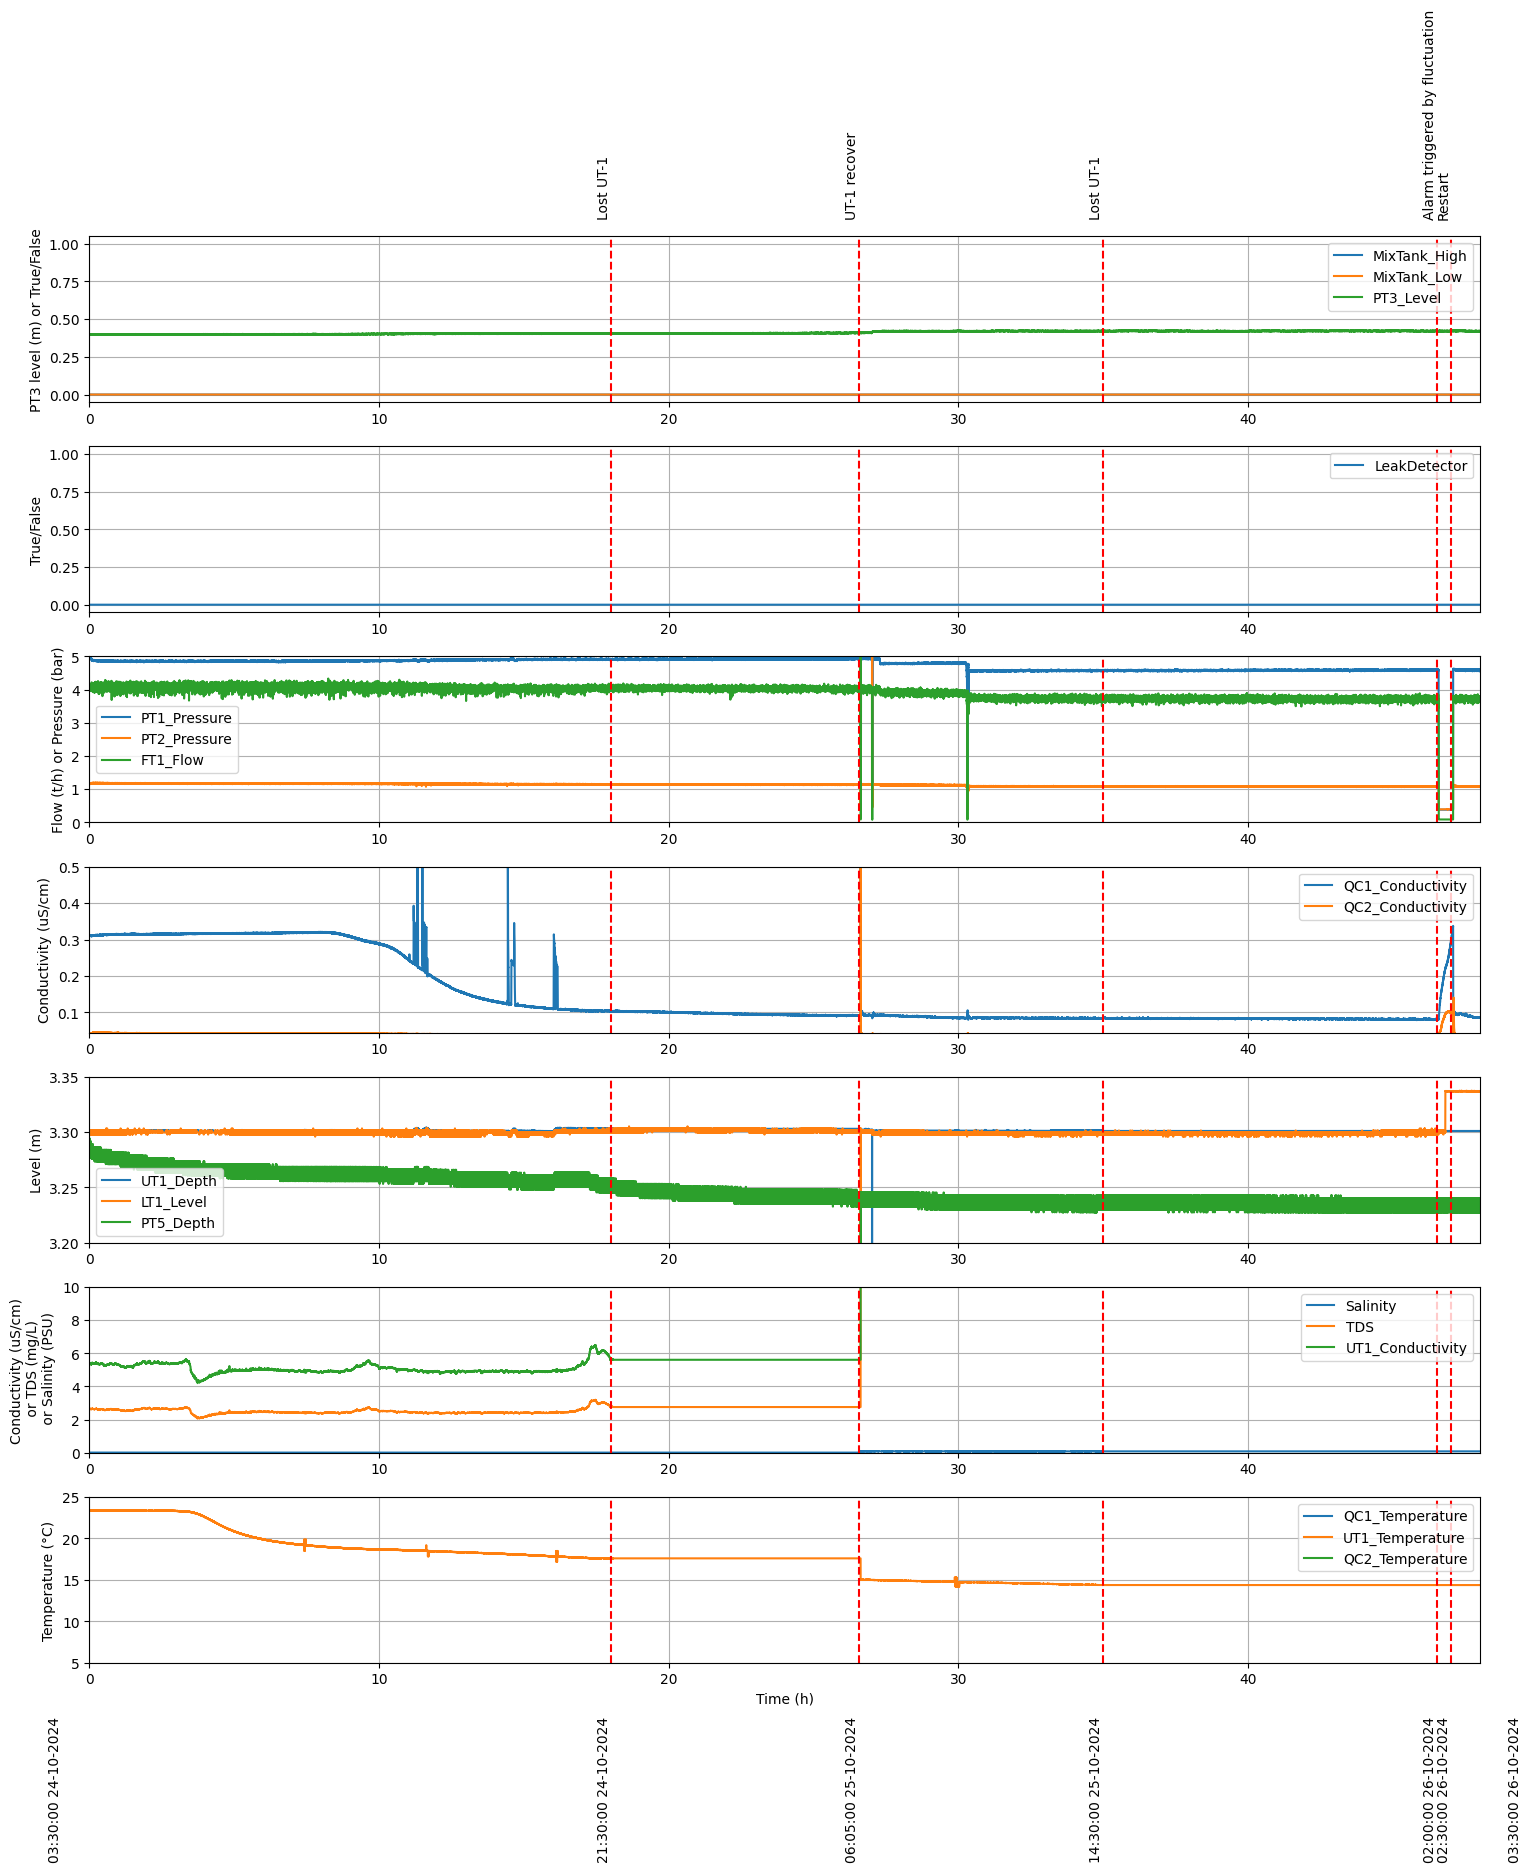

In [14]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,[ "03:30:00","03:30:00"],["24-10-2024","26-10-2024"],seconds_from_start,value_range,event_list)

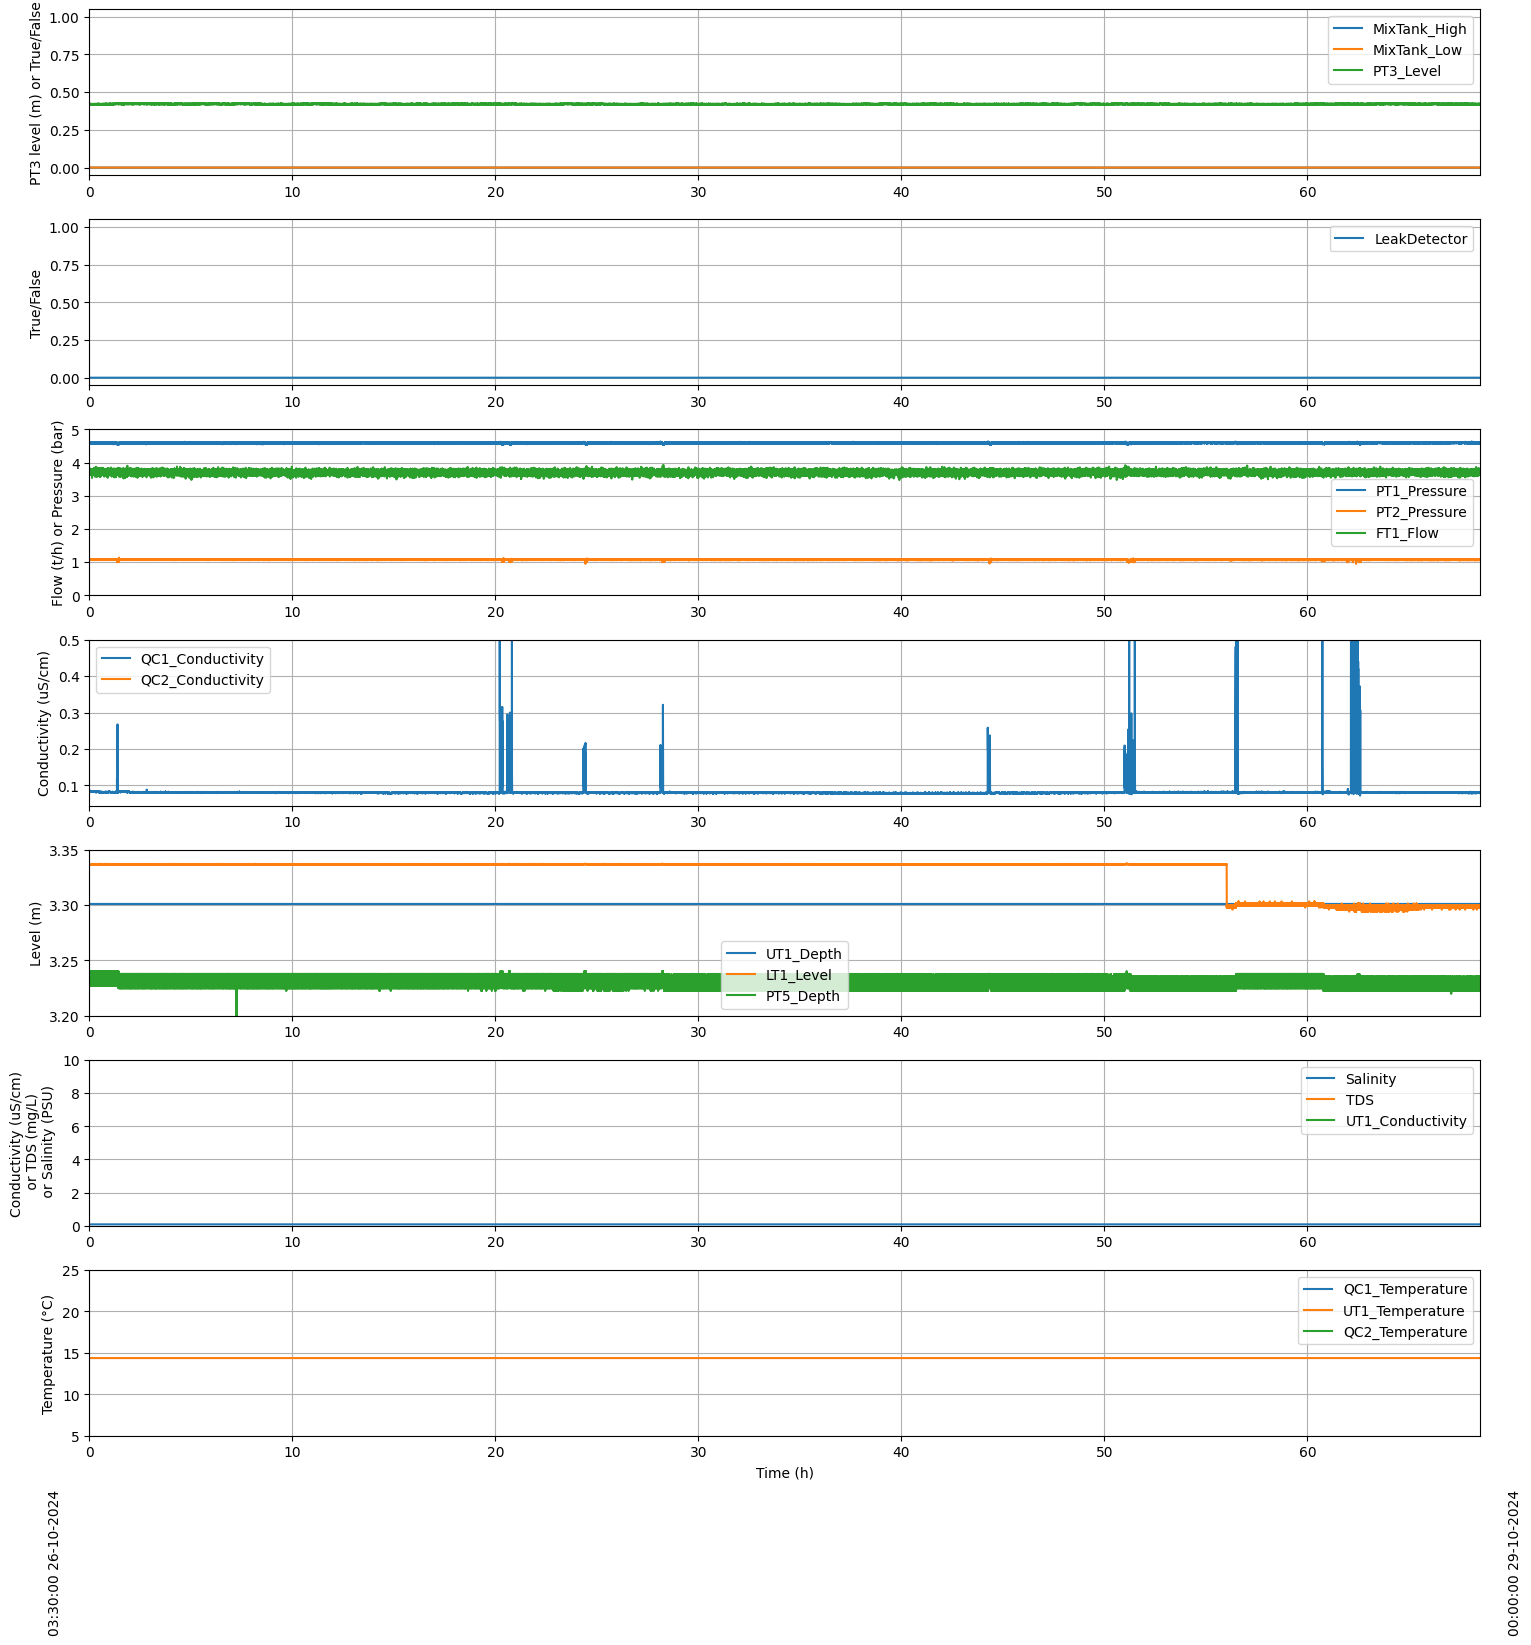

In [15]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[5,25]]
plot_data(data_list, columns_dict,[ "03:30:00","00:00:00"],["26-10-2024","29-10-2024"],seconds_from_start,value_range,event_list)

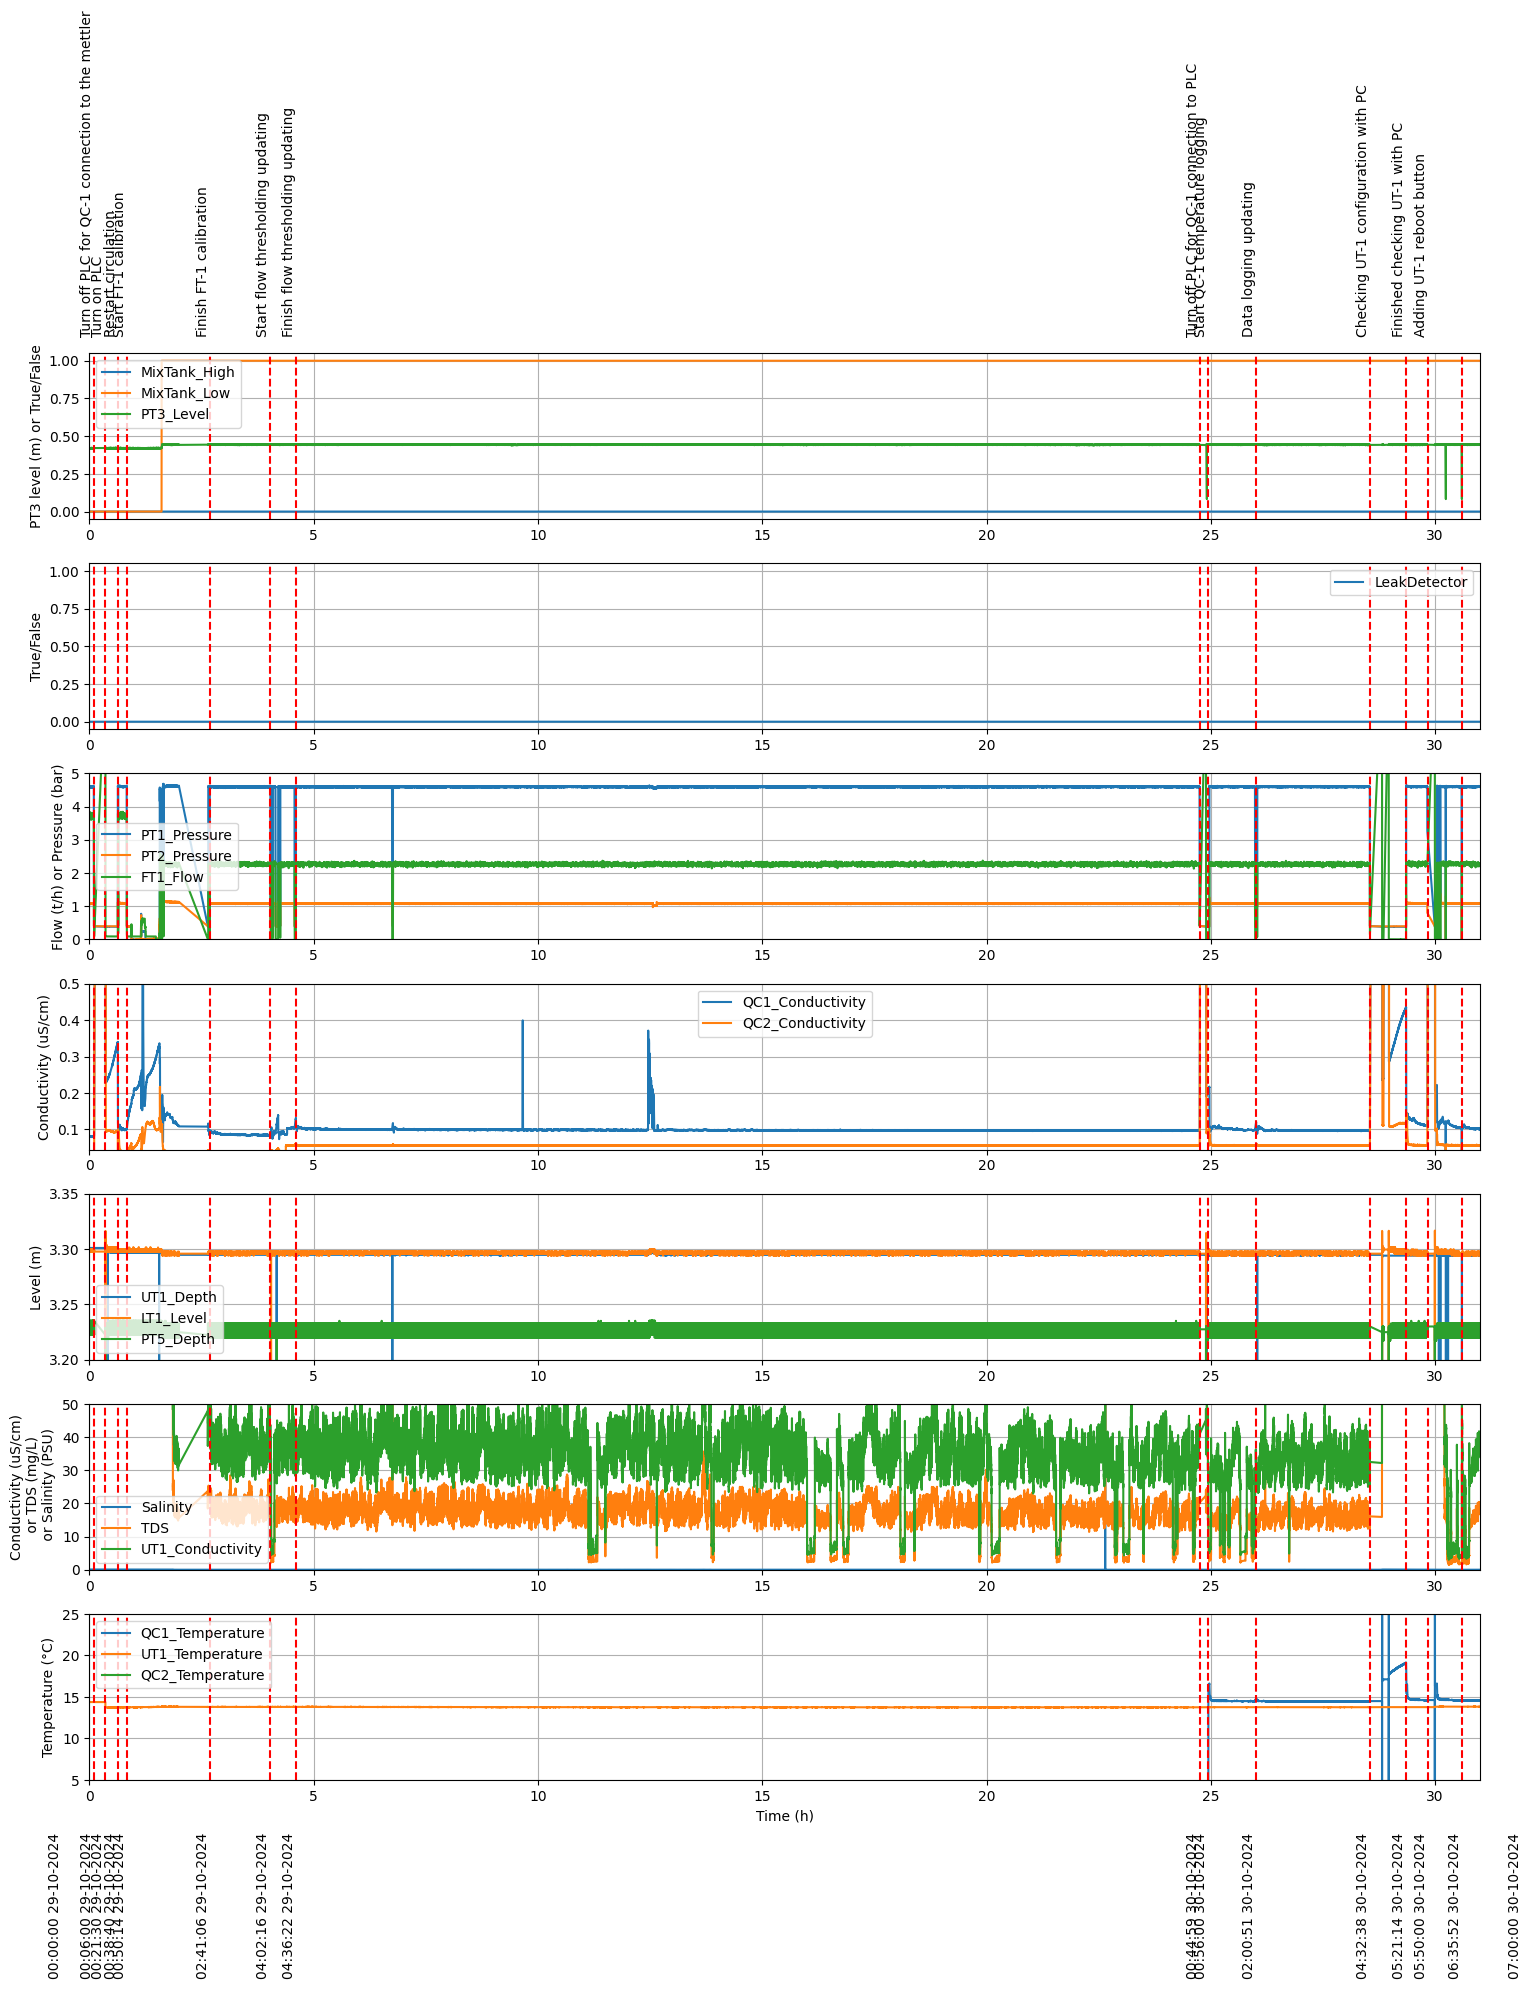

In [16]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,50],[5,25]]
plot_data(data_list, columns_dict,[ "00:00:00","07:00:00"],["29-10-2024","30-10-2024"],seconds_from_start,value_range,event_list)

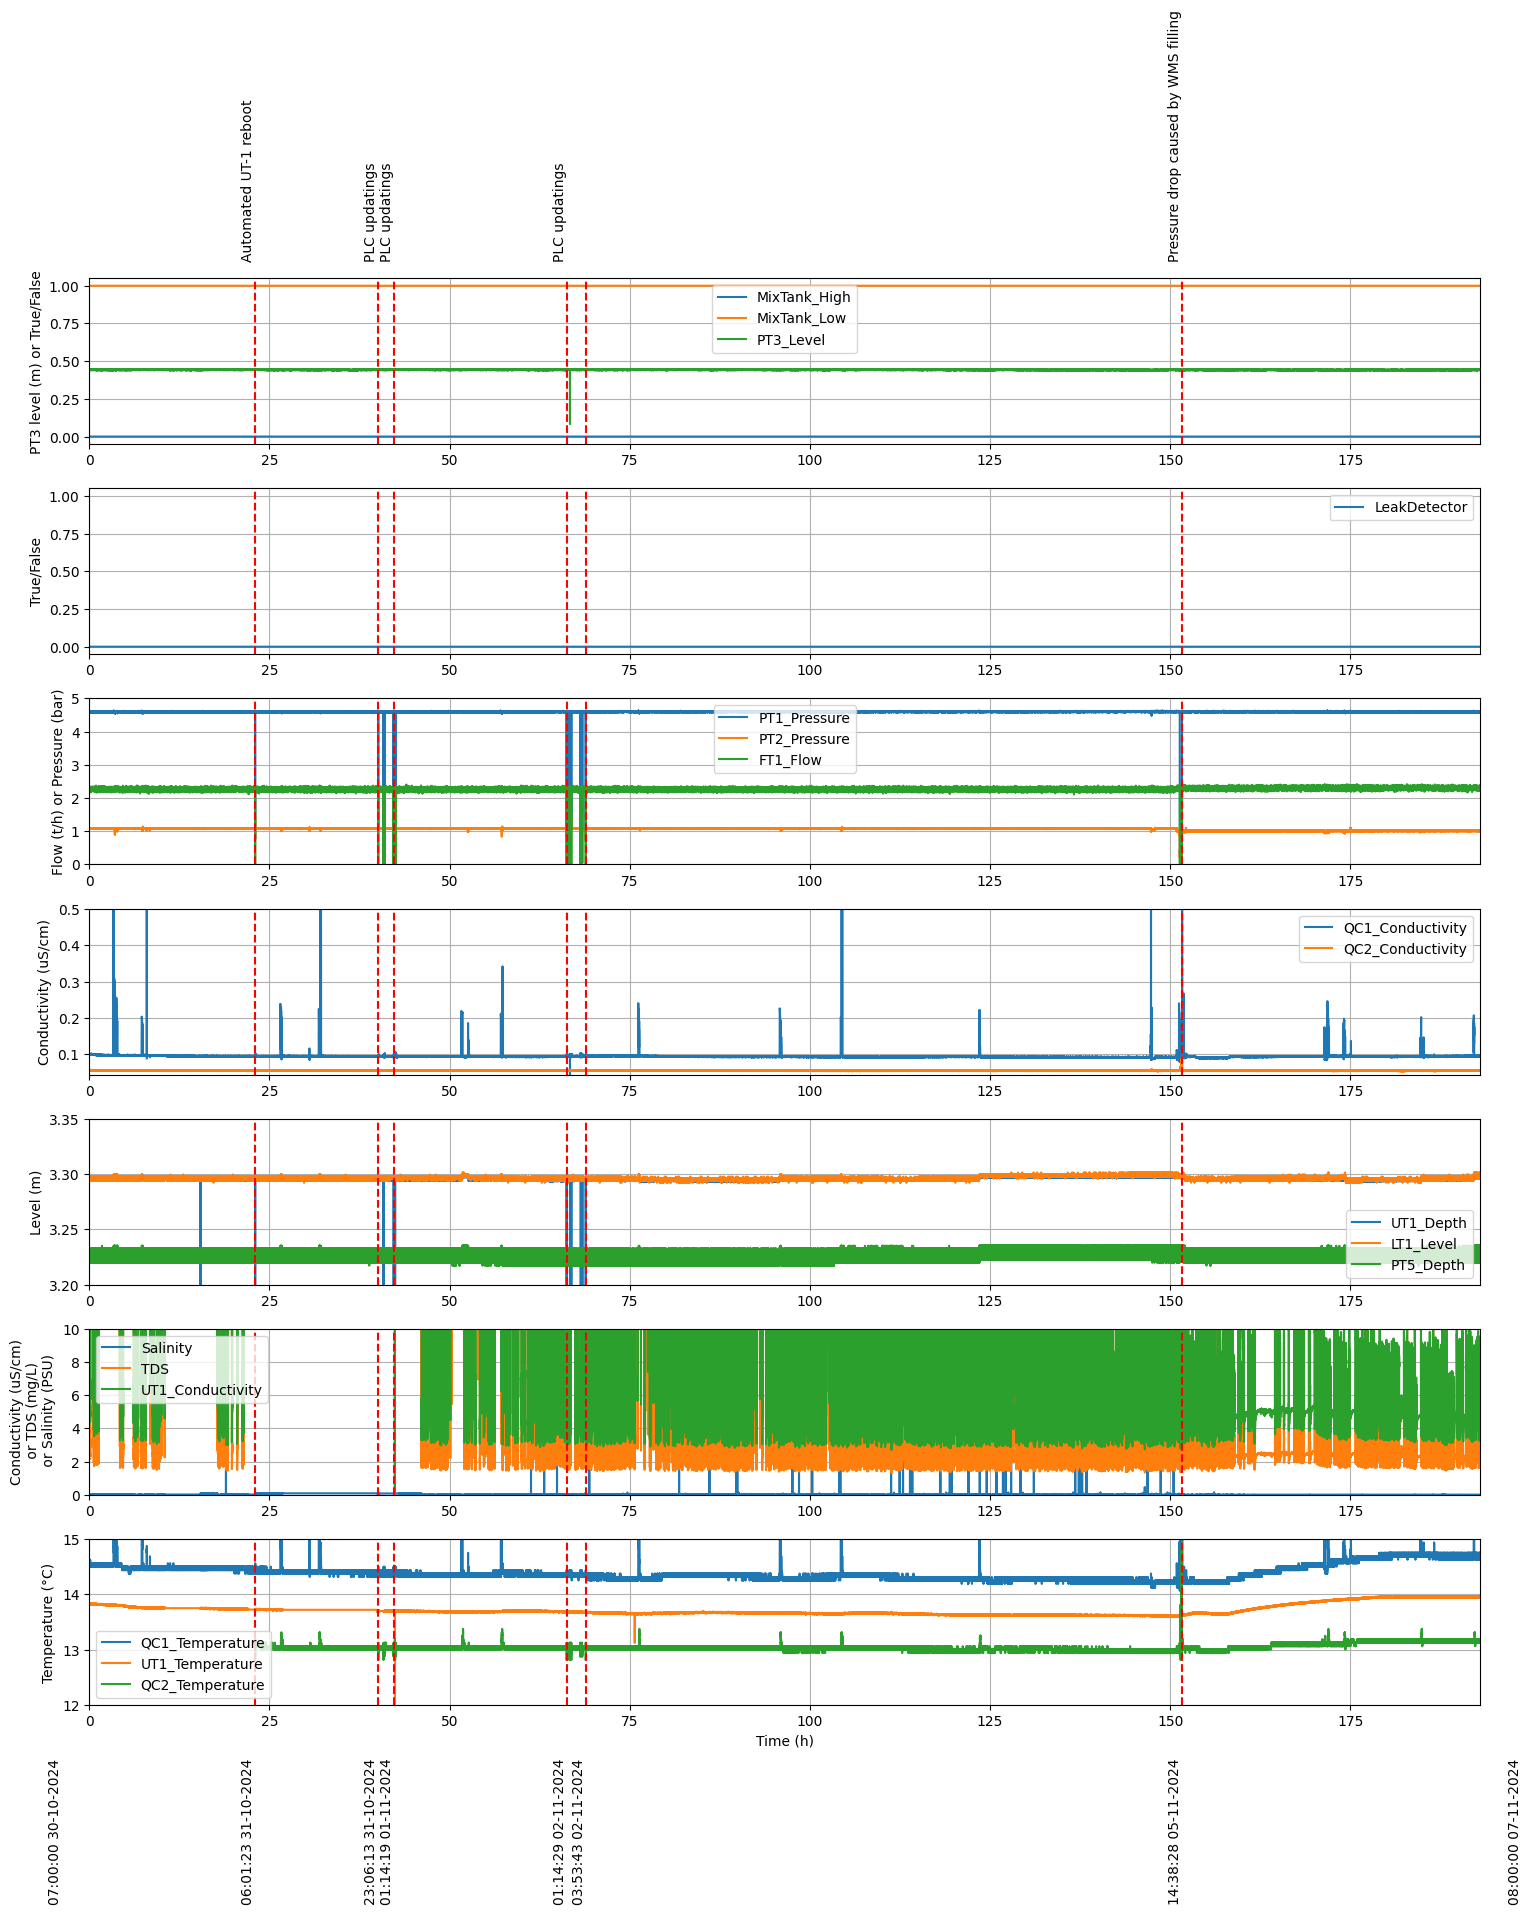

In [17]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[12,15]]
plot_data(data_list, columns_dict,[ "07:00:00","08:00:00"],["30-10-2024","07-11-2024"],seconds_from_start,value_range,event_list)

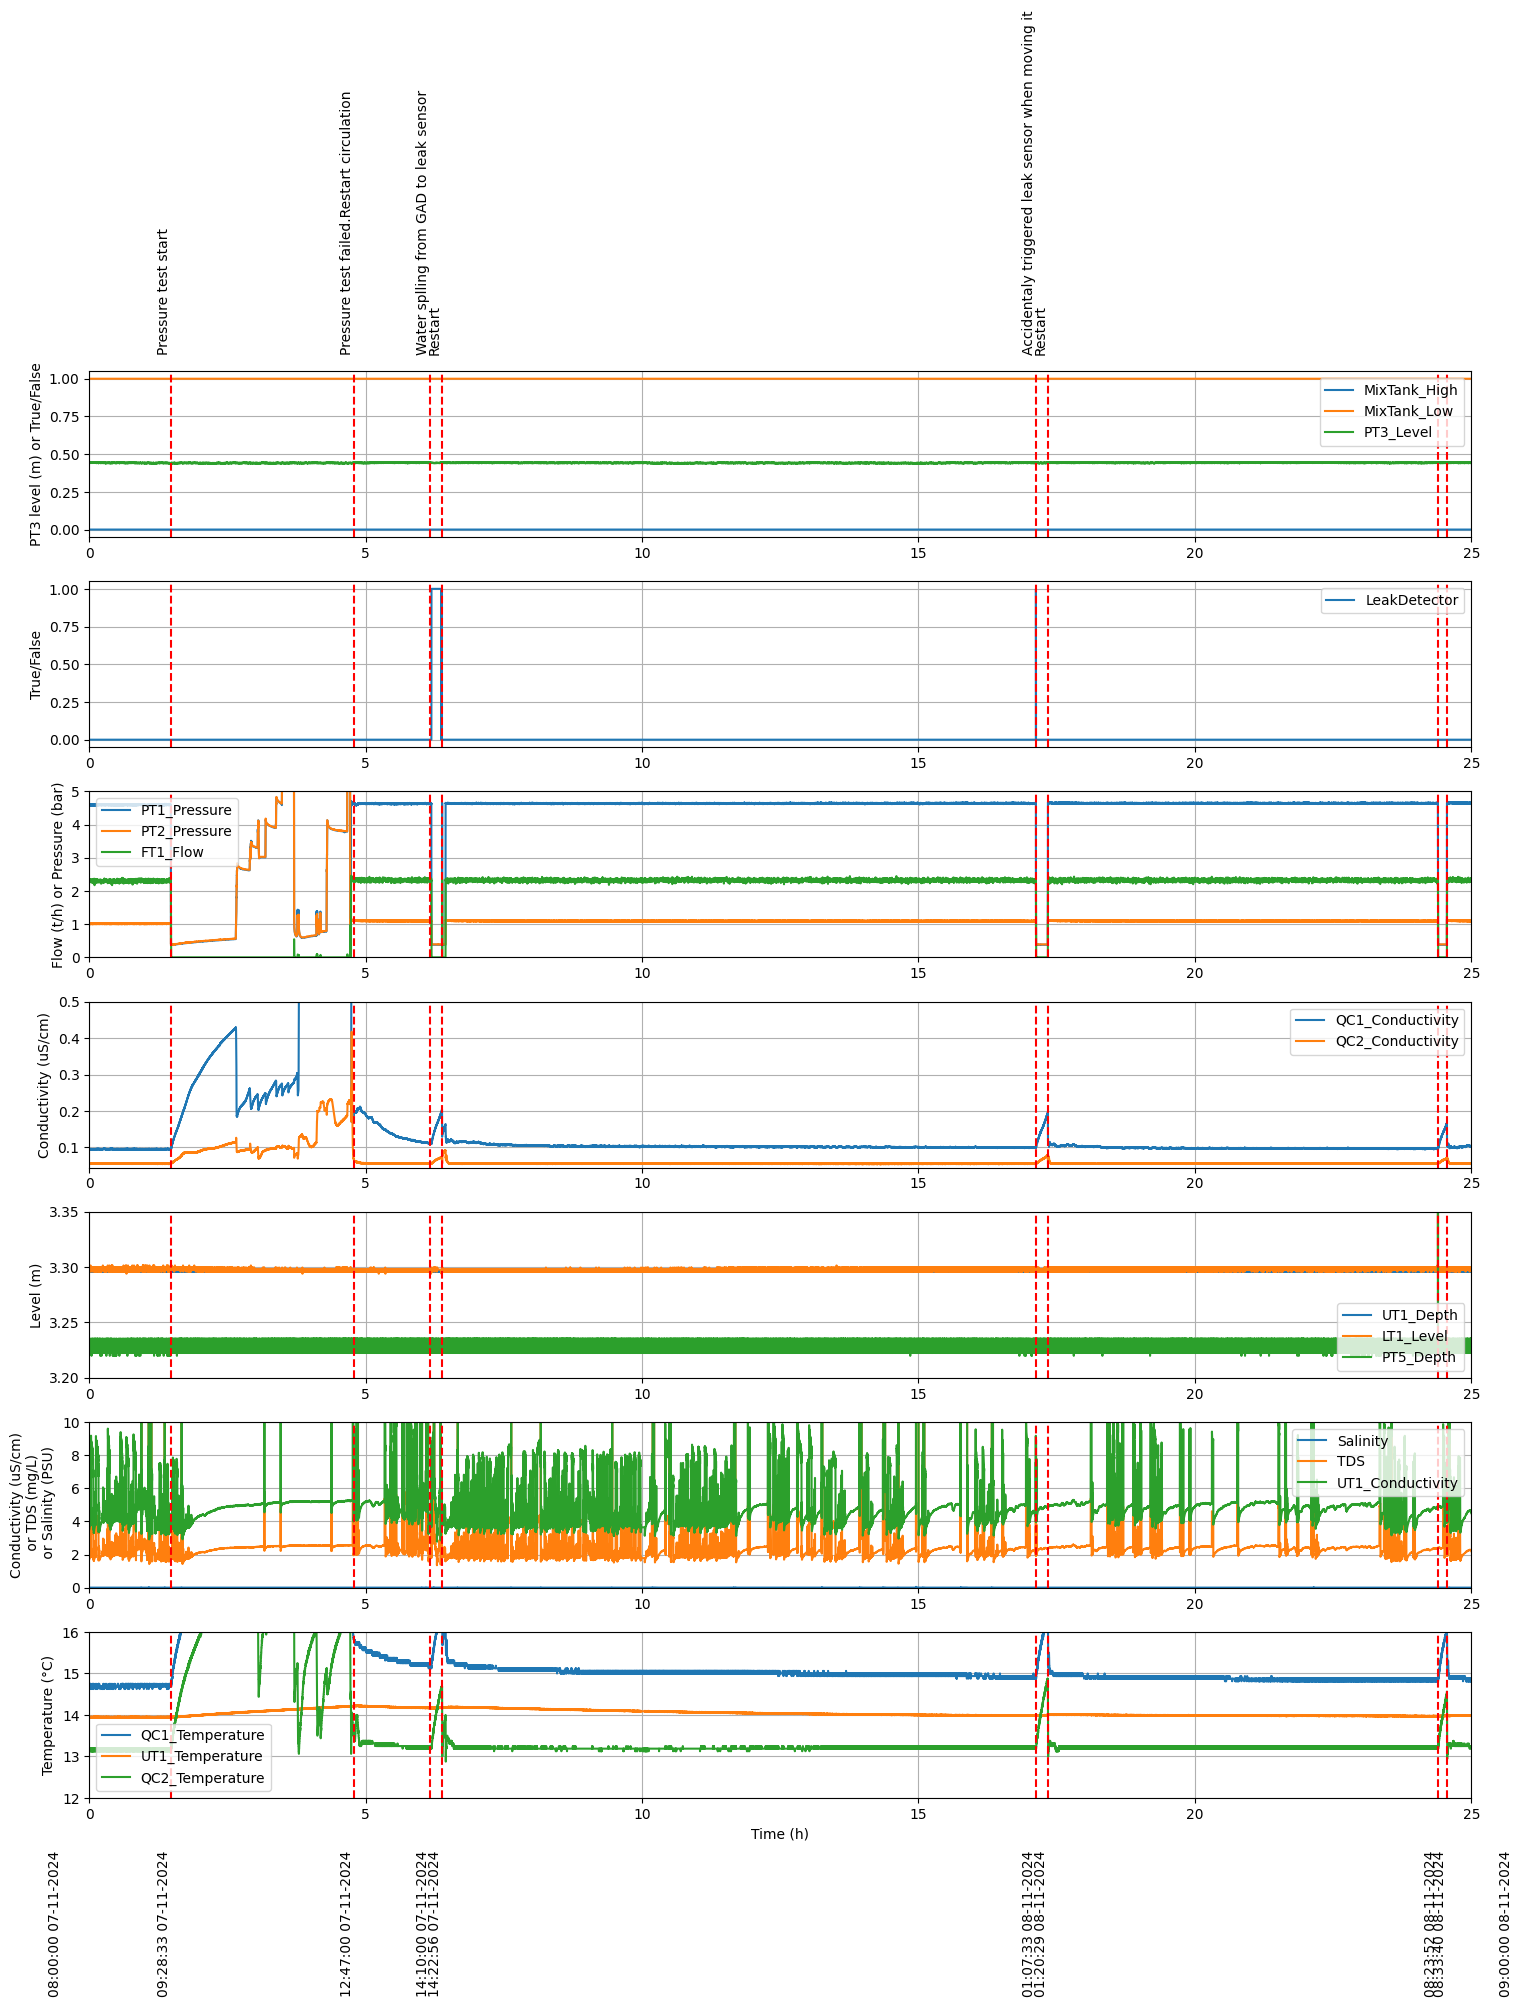

In [18]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[12,16]]
plot_data(data_list, columns_dict,[ "08:00:00","09:00:00"],["07-11-2024","08-11-2024"],seconds_from_start,value_range,event_list)

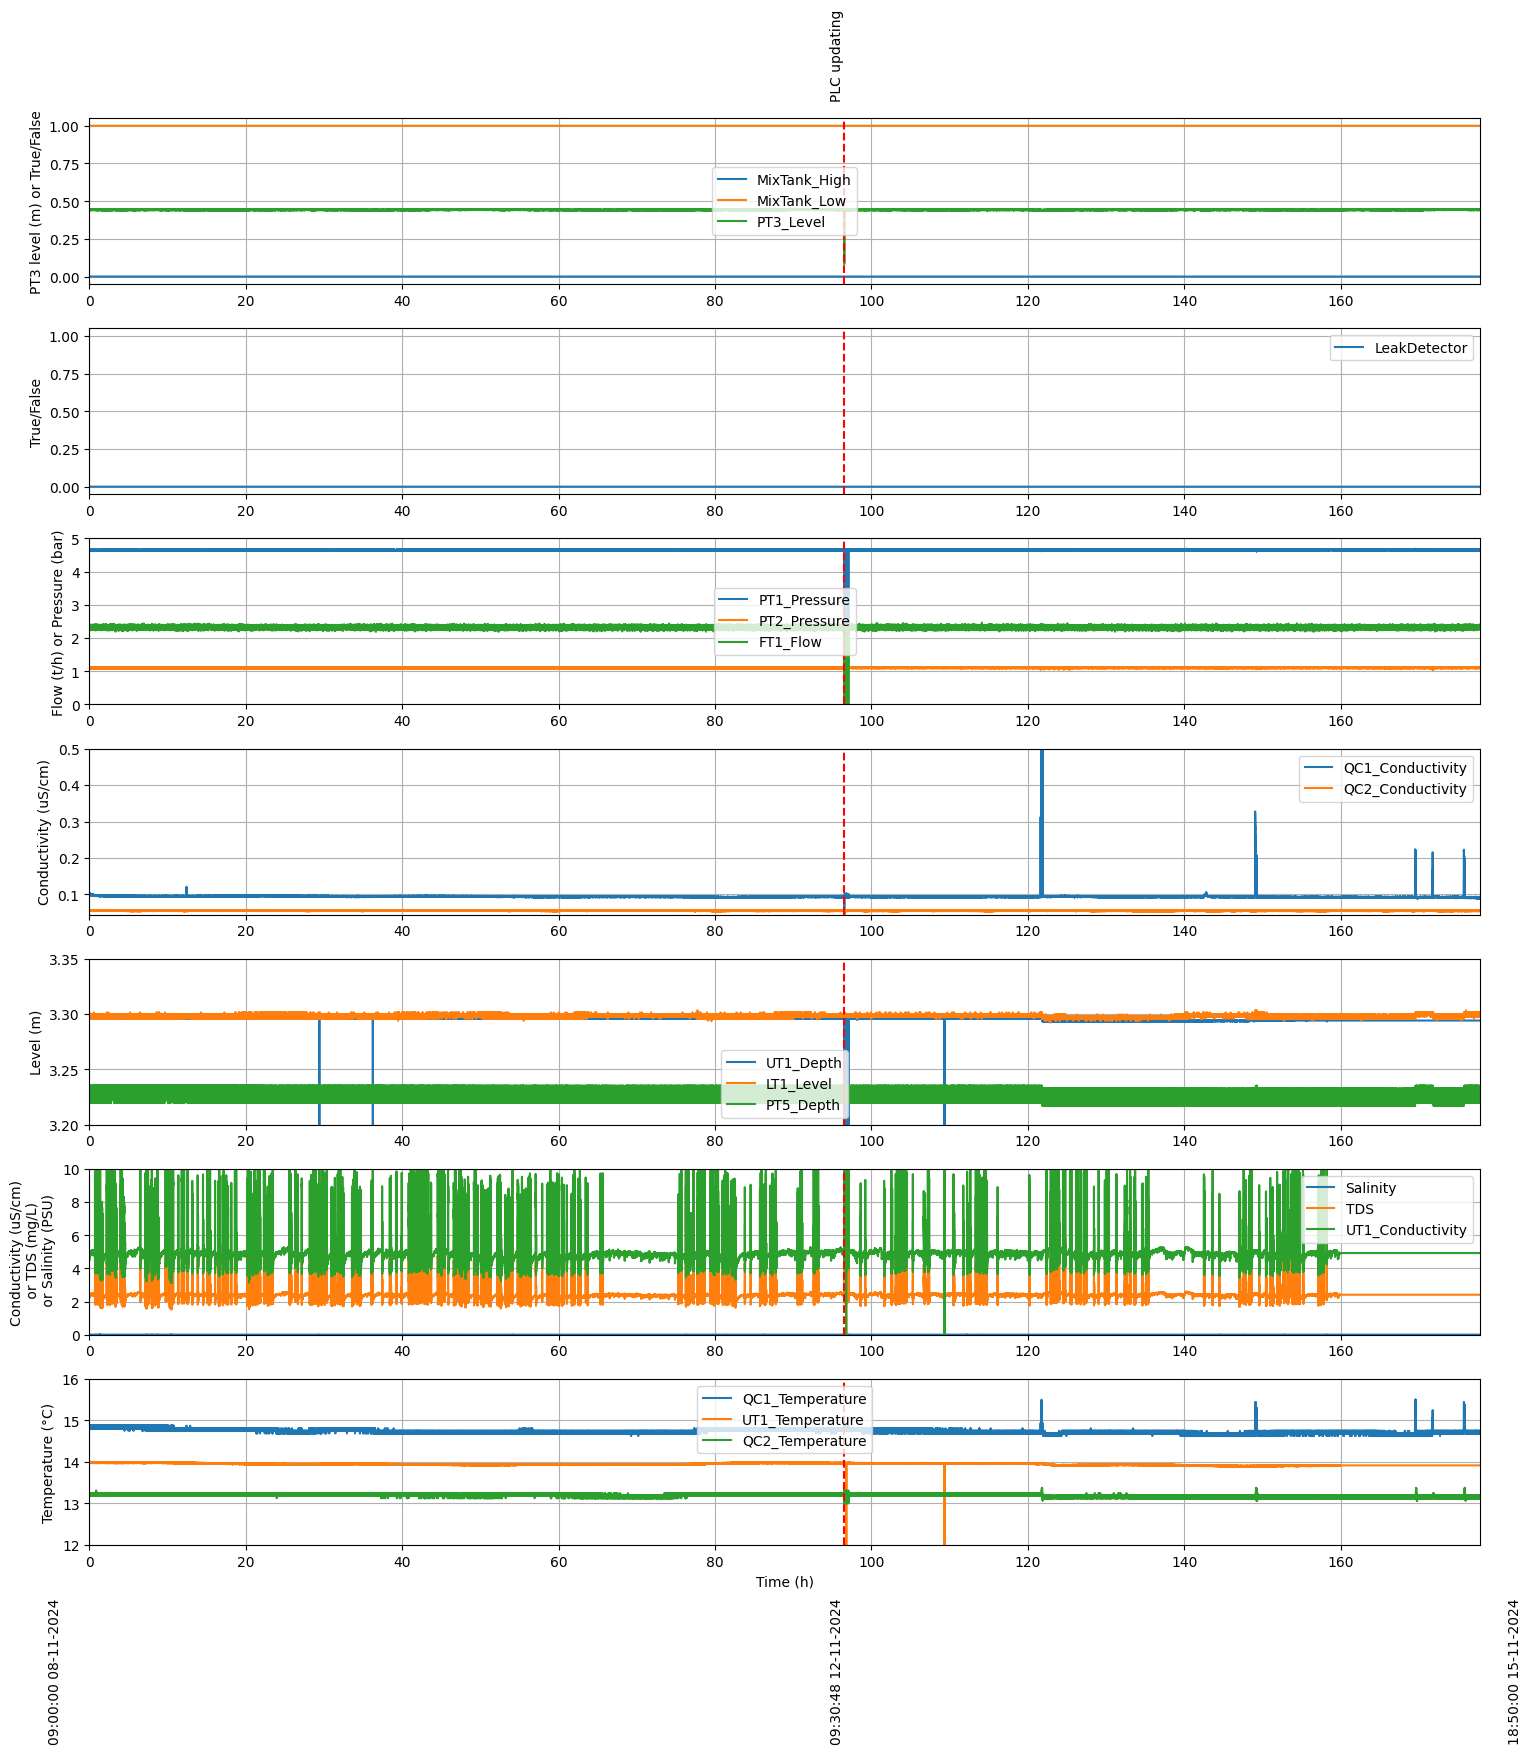

In [19]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[12,16]]
plot_data(data_list, columns_dict,[ "09:00:00","18:50:00"],["08-11-2024","15-11-2024"],seconds_from_start,value_range,event_list)

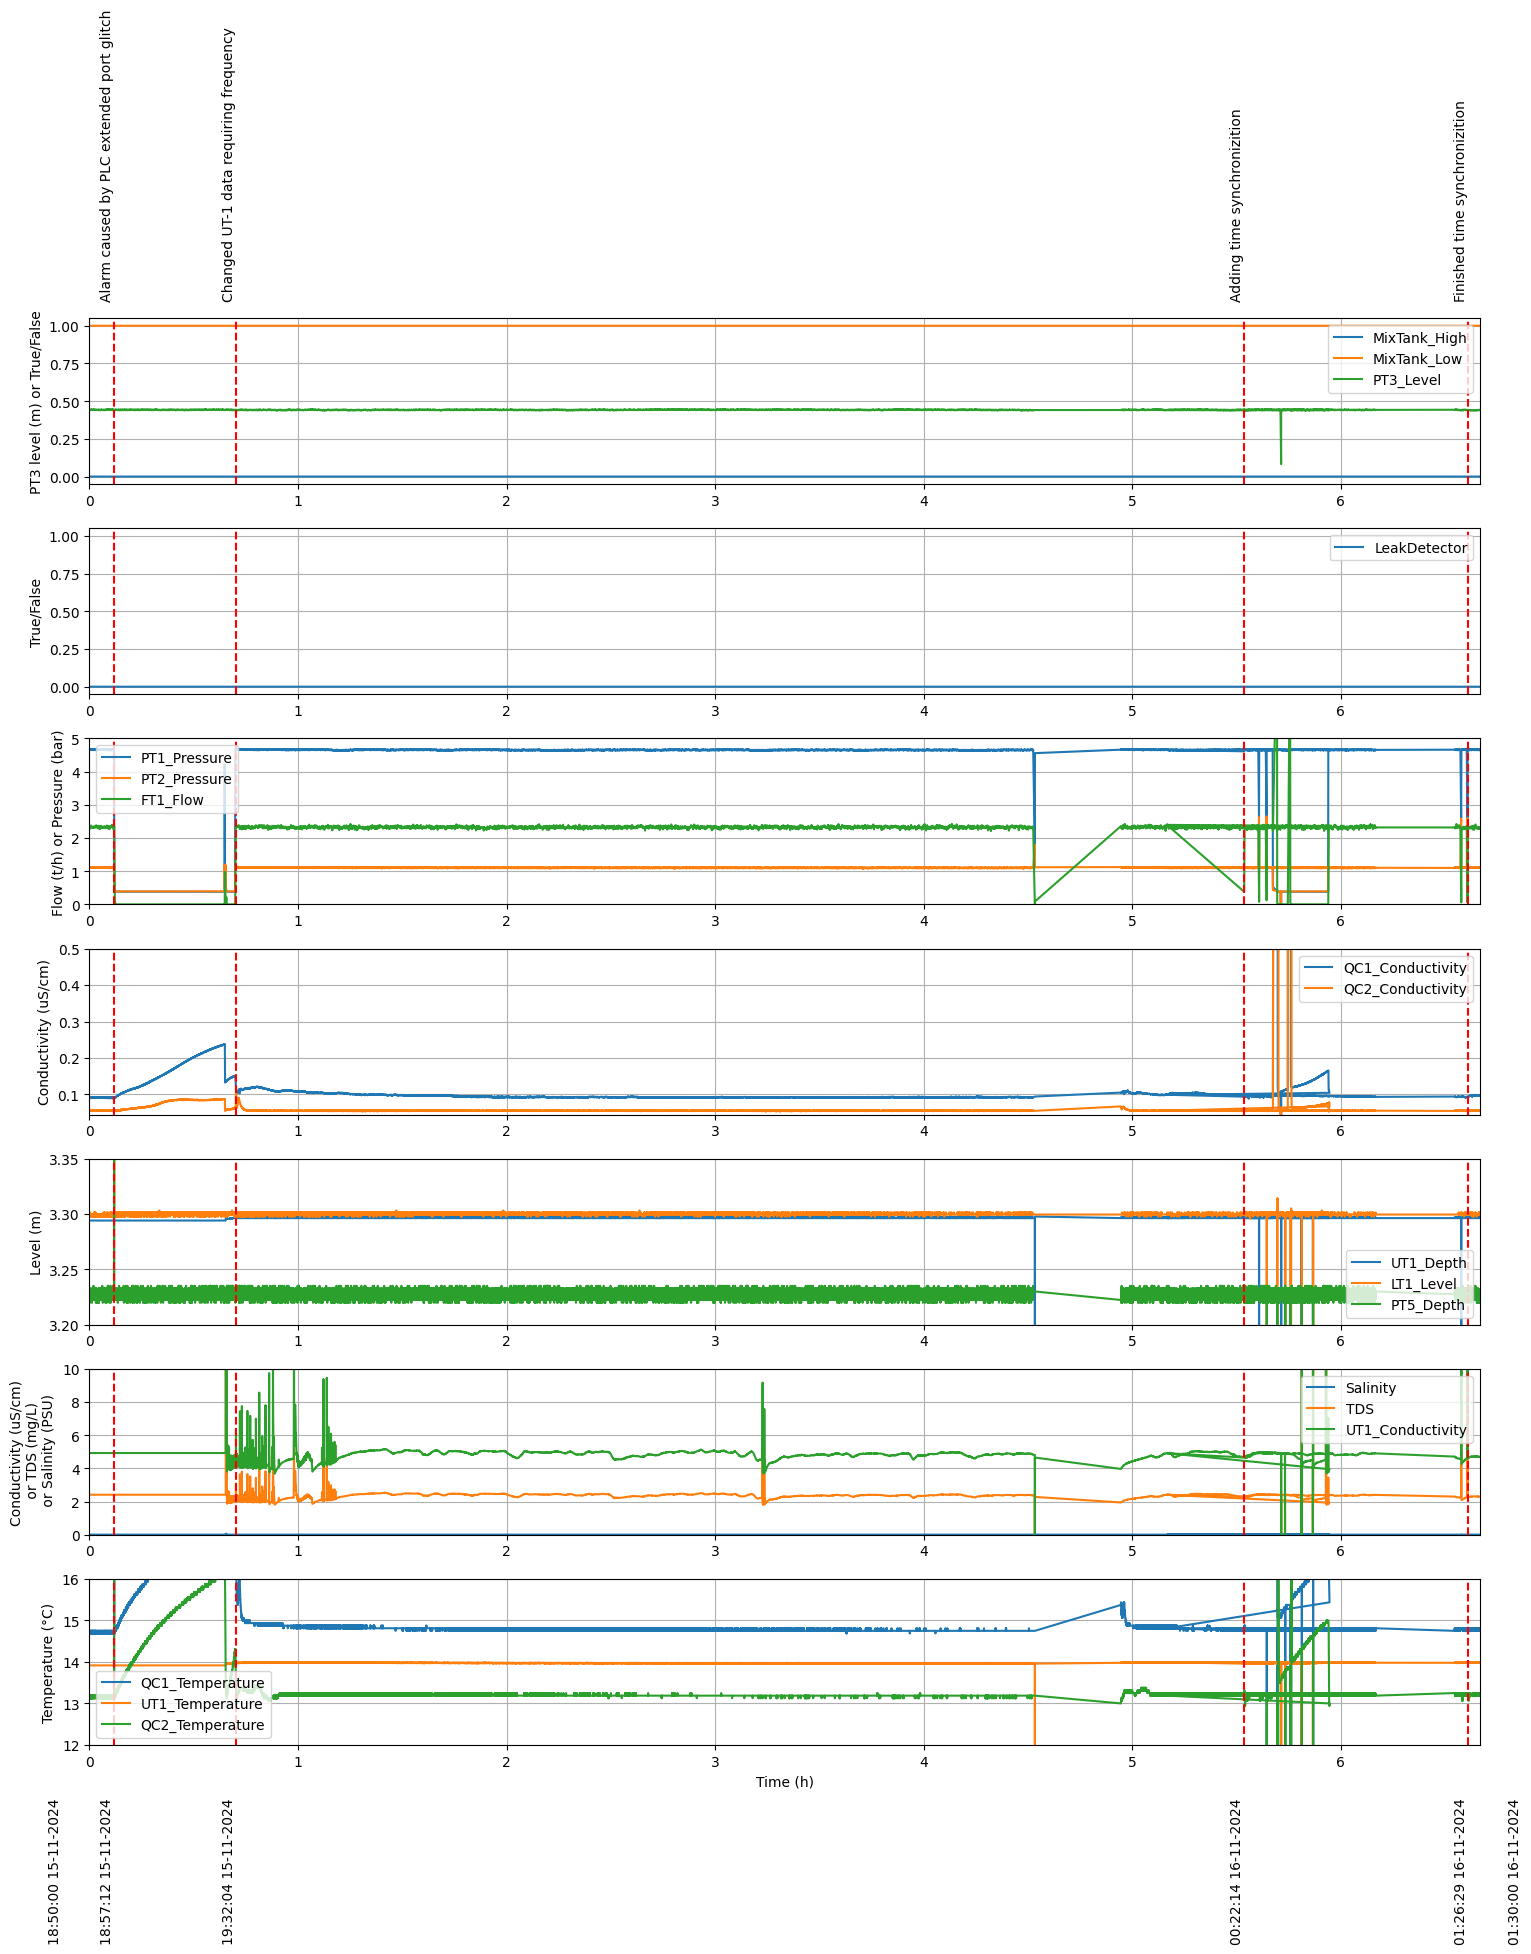

In [20]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[12,16]]
plot_data(data_list, columns_dict,[ "18:50:00","01:30:00"],["15-11-2024","16-11-2024"],seconds_from_start,value_range,event_list)

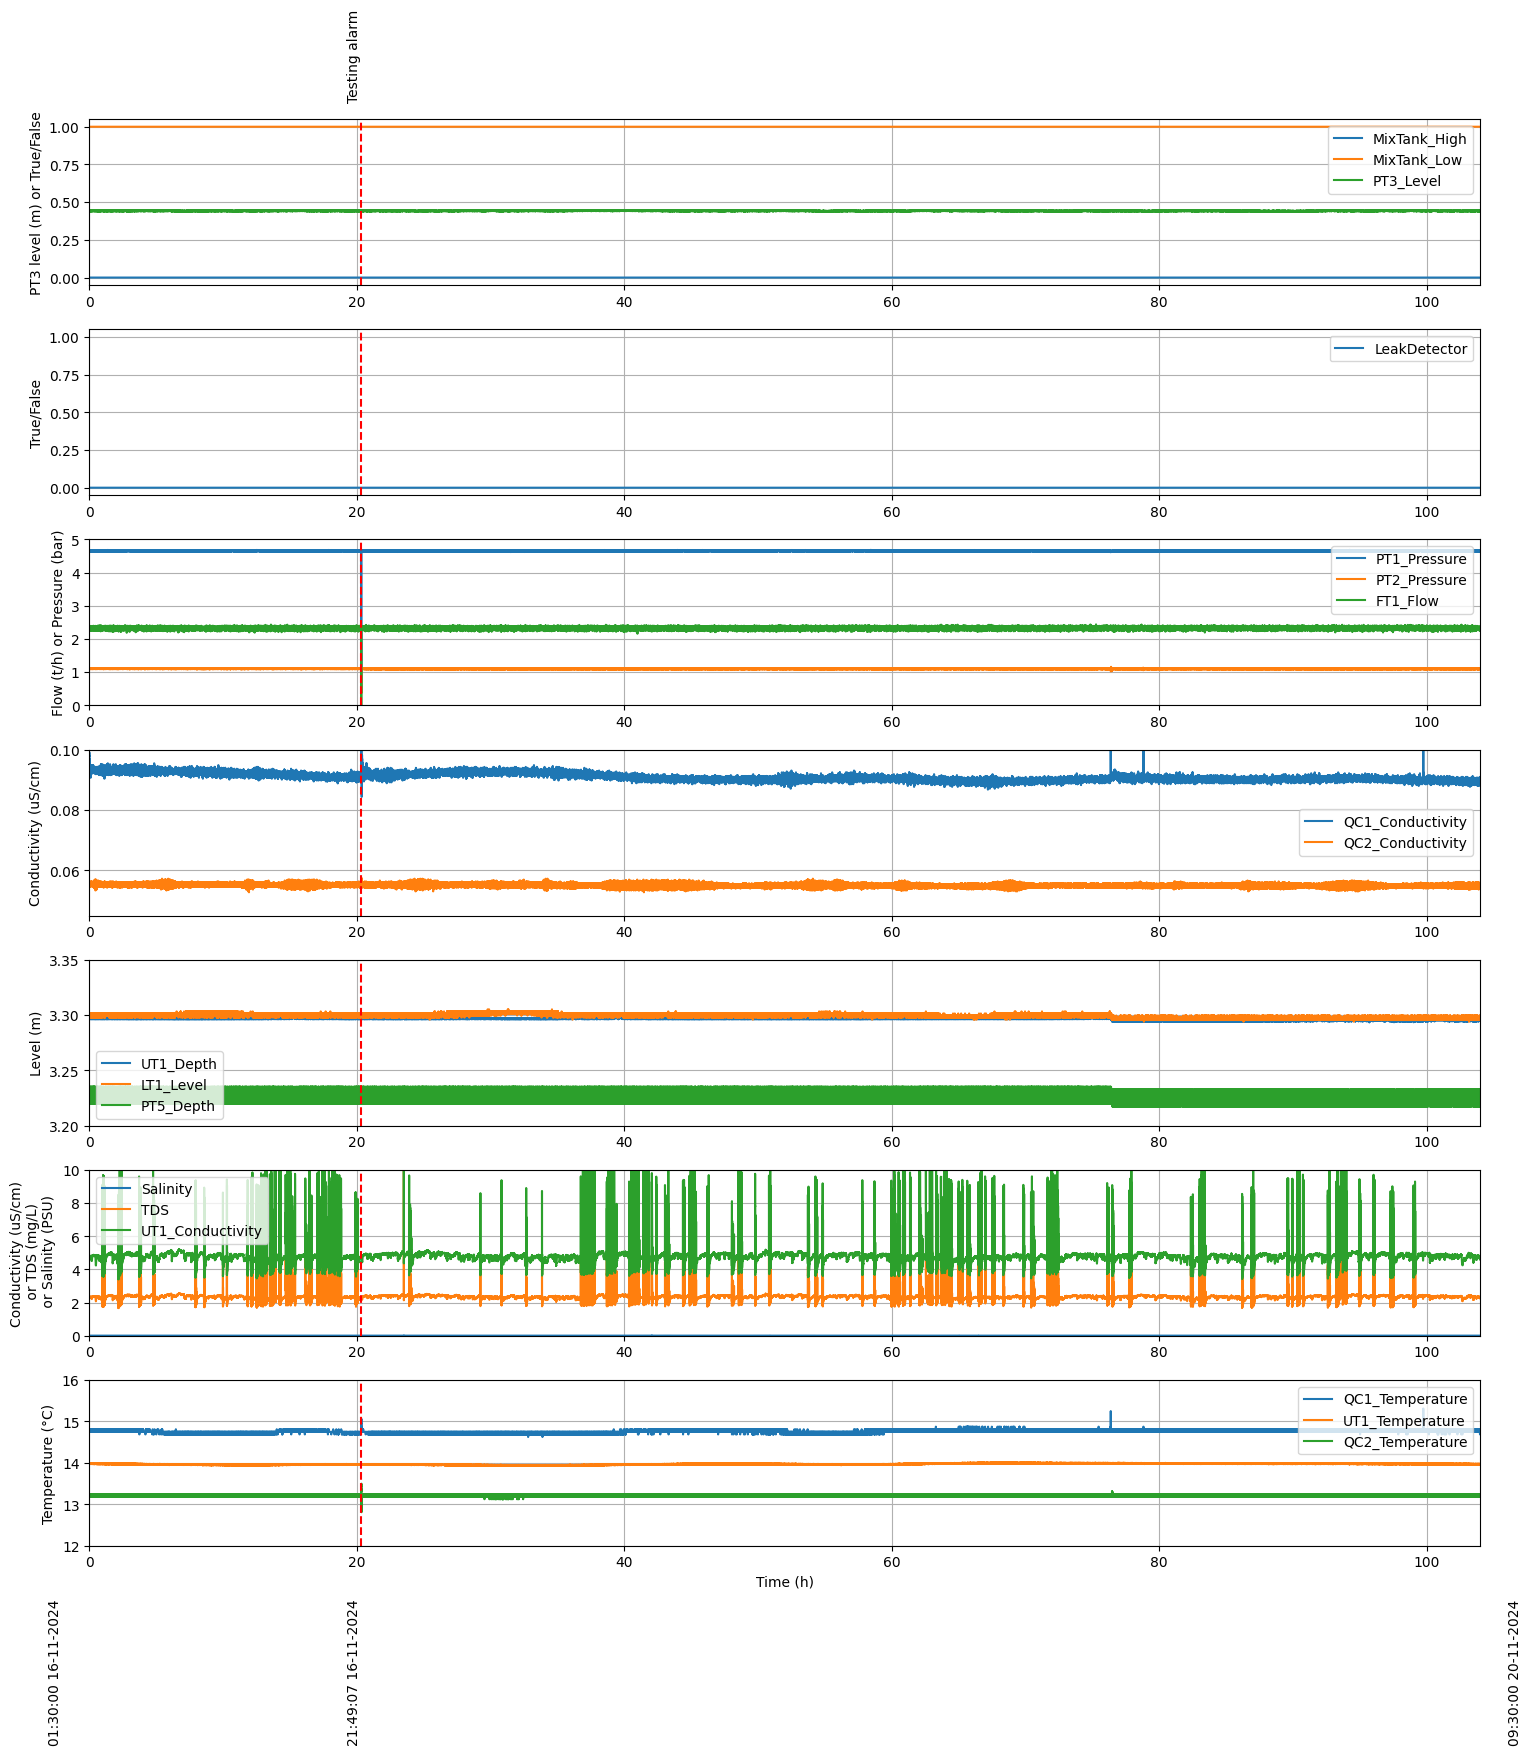

In [21]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.1],[3.2,3.35],[0,10],[12,16]]
plot_data(data_list, columns_dict,[ "01:30:00","09:30:00"],["16-11-2024","20-11-2024"],seconds_from_start,value_range,event_list)

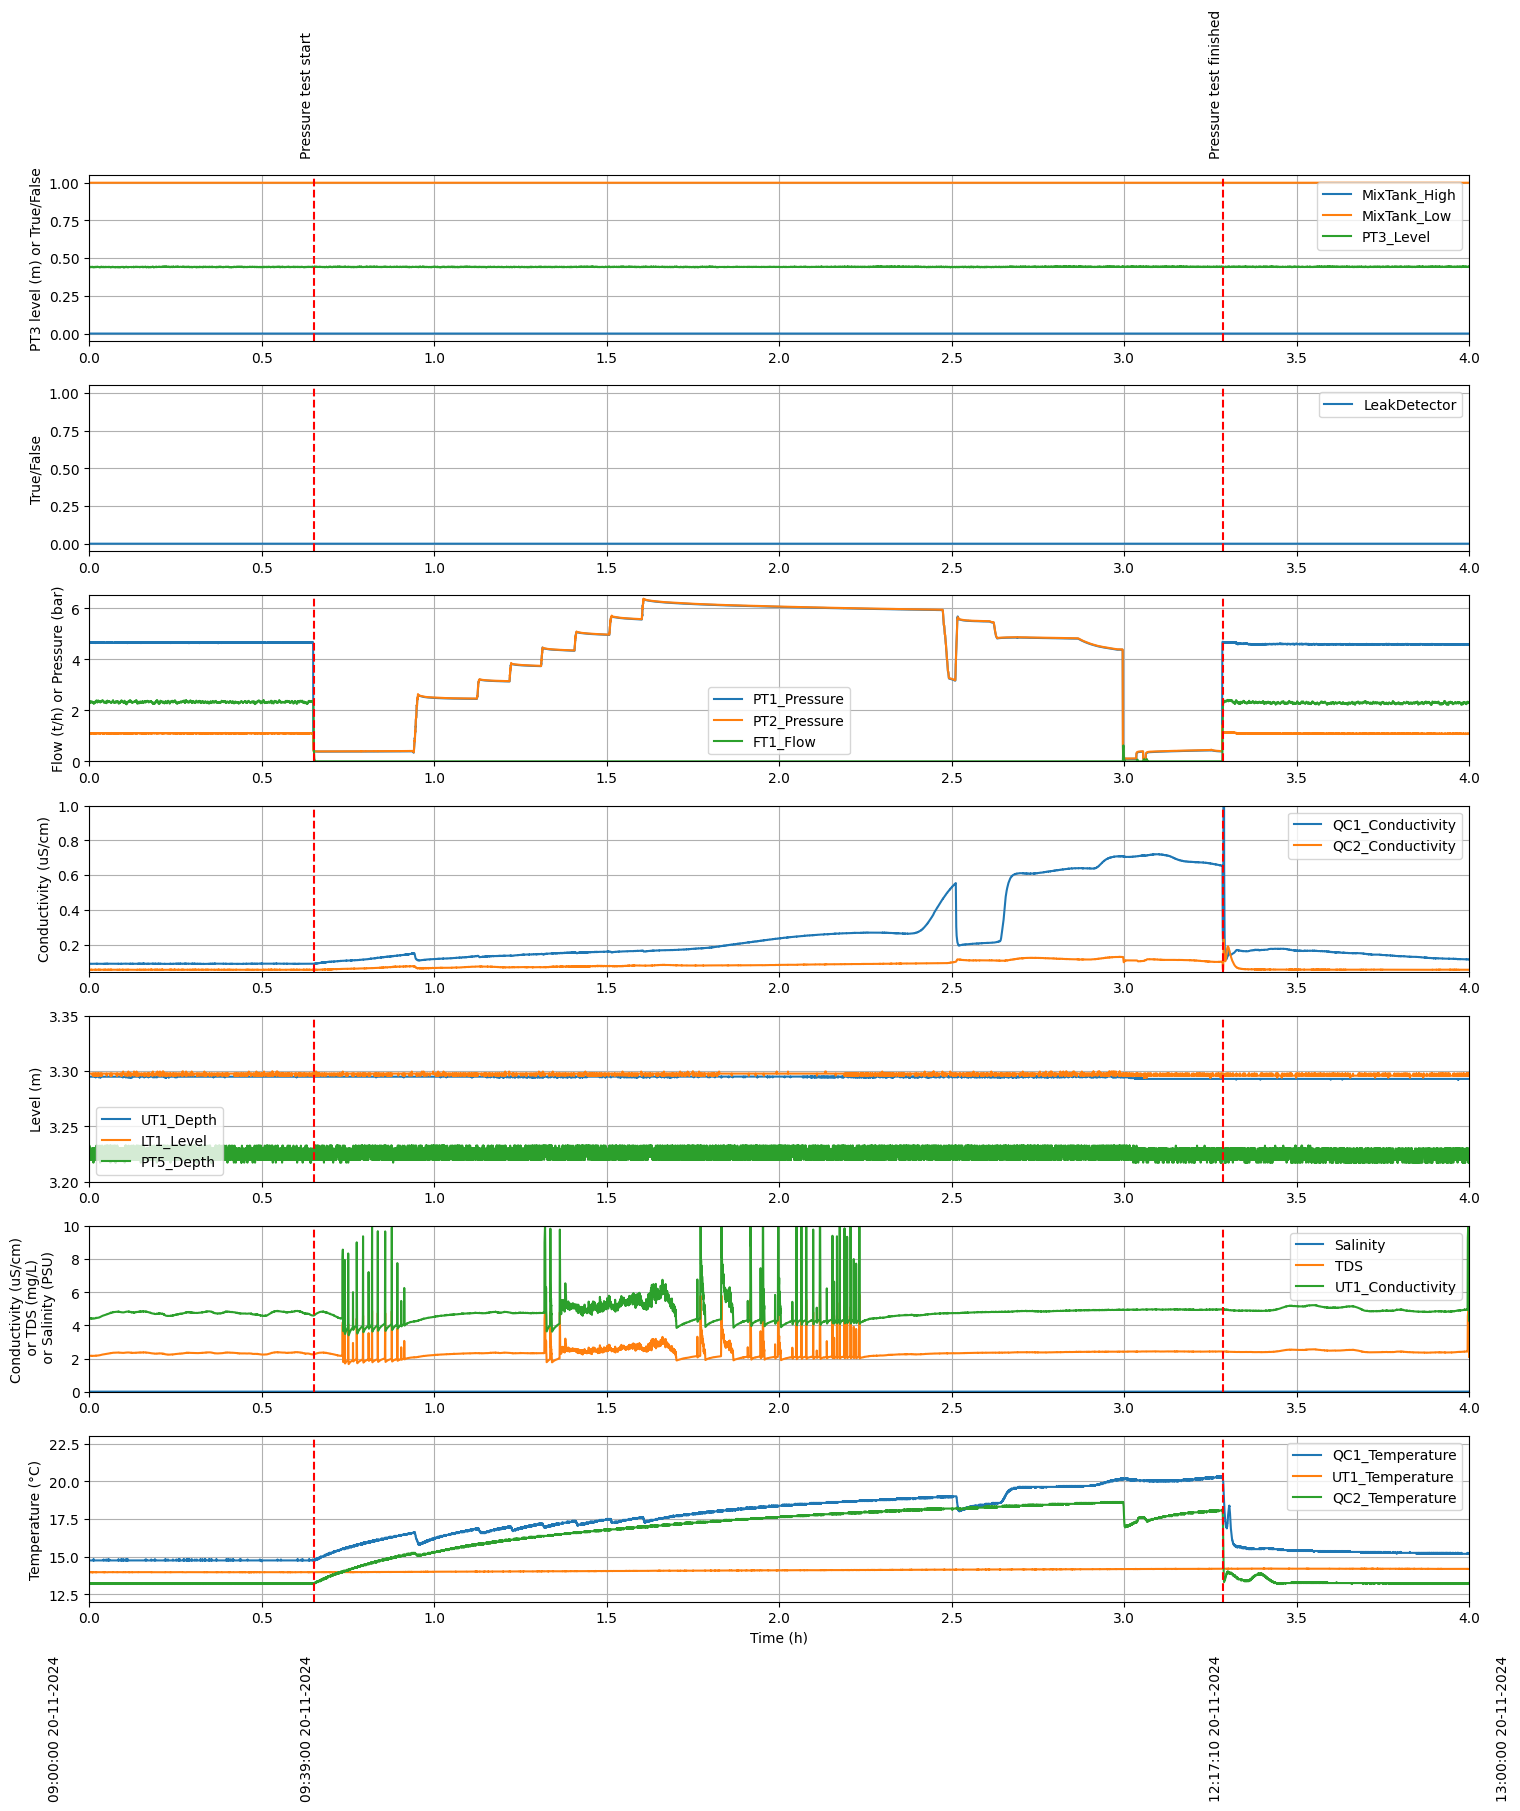

In [22]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,6.5],[0.045,1],[3.2,3.35],[0,10],[12,23]]
plot_data(data_list, columns_dict,[ "09:00:00","13:00:00"],["20-11-2024","20-11-2024"],seconds_from_start,value_range,event_list)

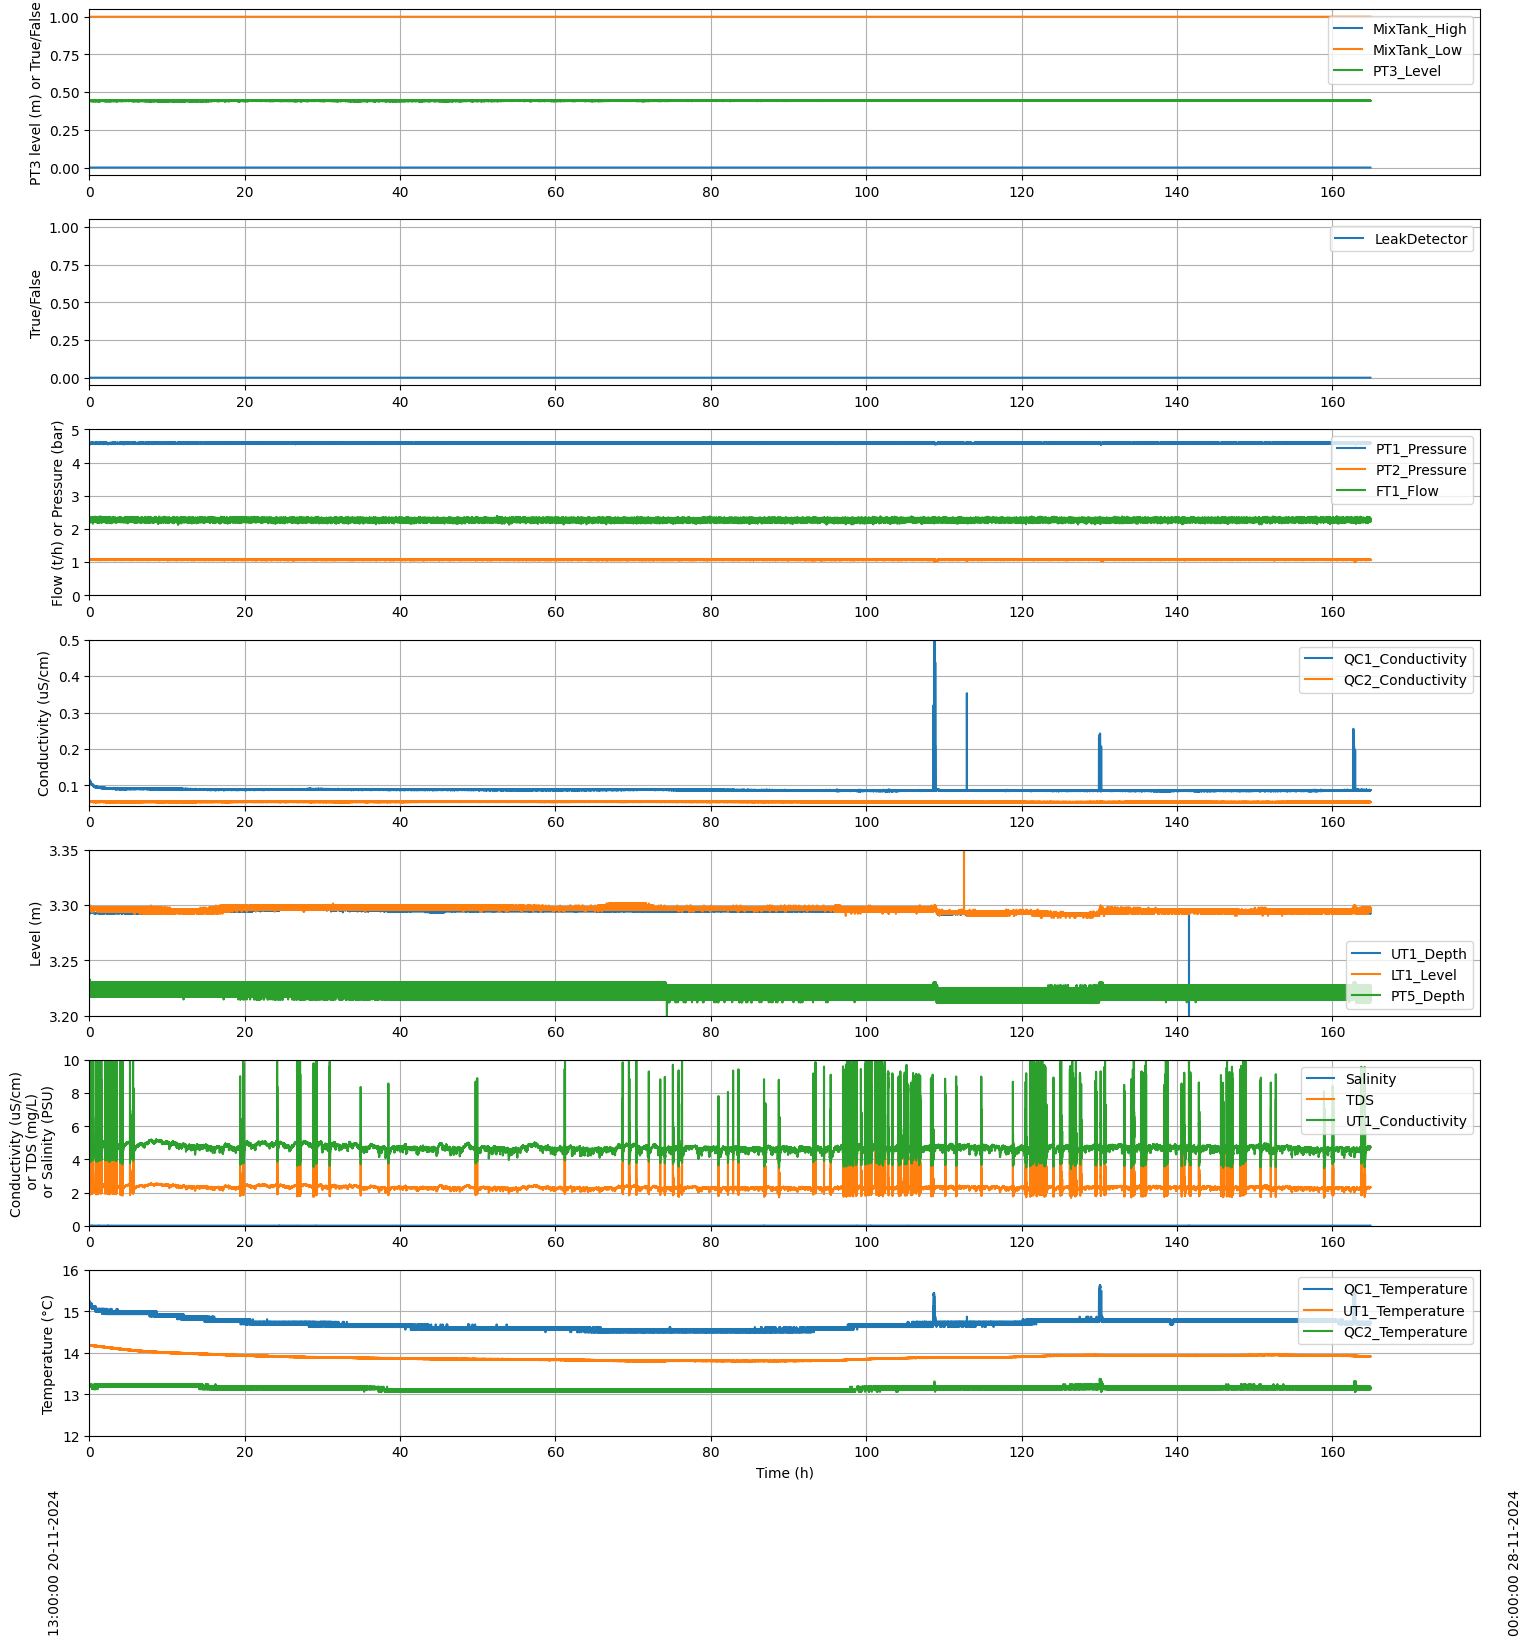

In [23]:
event_list = read_event_list("../logging.txt")
value_range=[[-0.05,1.05],[-0.05,1.05],[0,5],[0.045,0.5],[3.2,3.35],[0,10],[12,16]]
plot_data(data_list, columns_dict,[ "13:00:00","00:00:00"],["20-11-2024","28-11-2024"],seconds_from_start,value_range,event_list)

In [49]:
def plot_QC_data(data_dict, columns_dict, time_range, date_range, seconds_from_start, value_plot_range, event_list):
    # Converts start and end time to datetime
    second_range = np.array(calculate_seconds(date_range, time_range), dtype=int)
    
    # Set up a single plot (removes all extra subplots)
    fig, ax = plt.subplots(figsize=(30, 6))

    event_seconds = np.array(calculate_seconds(event_list[1], event_list[0]), dtype=int)

    # Filter data based on time range
    mask = (seconds_from_start >= second_range[0]) & (seconds_from_start <= second_range[1])
    event_mask = (event_seconds >= second_range[0]) & (event_seconds <= second_range[1])

    filtered_second = seconds_from_start[mask]
    filtered_event_hours = (event_seconds[event_mask] - second_range[0]) / 3600
    time_scale = (filtered_second - second_range[0]) / 3600
    filtered_event_name = event_list[2][event_mask]

    # Focus on "skid_water_quality"
    if "skid_water_quality" in data_dict:
        sub_dict = data_dict["skid_water_quality"]
        group_keys = list(sub_dict)
        
        # Plot data for each key in the group
        for group_key in group_keys:
            if group_key in columns_dict:
                value_data = columns_dict[group_key]
                filtered_values = value_data[mask]
                ax.plot(time_scale, filtered_values, label=group_key)

        # Add event markers if applicable
        if filtered_event_name.shape[0] != 0:
            ax.vlines(filtered_event_hours, *value_plot_range, colors='r', linestyle="--")

        # Configure plot labels and settings
        ax.set_xlim(0, (second_range[1] - second_range[0]) / 3600)
        ax.set_ylabel("Skid water quality")  # Assuming title[0] corresponds to skid_water_quality
        ax.set_ylim(0,5)
        ax.legend()
        ax.grid(True)

    last_ax = ax  # Last subplot for adding time labels
    last_ax.set_xlabel("Time (h)")
    
    fig.text(-0.03, -0.5, f"{time_range[0]} {date_range[0]}",
             transform=last_ax.transAxes, fontsize=10, ha='left', va='bottom', color='black', rotation=90)
    fig.text(1.03, -0.5, f"{time_range[1]} {date_range[1]}",
             transform=last_ax.transAxes, fontsize=10, ha='right', va='bottom', color='black', rotation=90)

    # Add event labels inside the plot area with adjusted position
    for hour, time, date, name in zip(filtered_event_hours, event_list[0][event_mask], event_list[1][event_mask], filtered_event_name):
        fig.text(hour / ((second_range[-1] - second_range[0]) / 3600), -0.5, f"{time} {date}",
                 transform=last_ax.transAxes, fontsize=9, ha='center', va='bottom', color='black', rotation=90)
        fig.text(hour / ((second_range[-1] - second_range[0]) / 3600), 1.05, f"{name}",
                 transform=last_ax.transAxes, fontsize=9, ha='center', va='bottom', color='black', rotation=90)

    plt.tight_layout()
    plt.show()

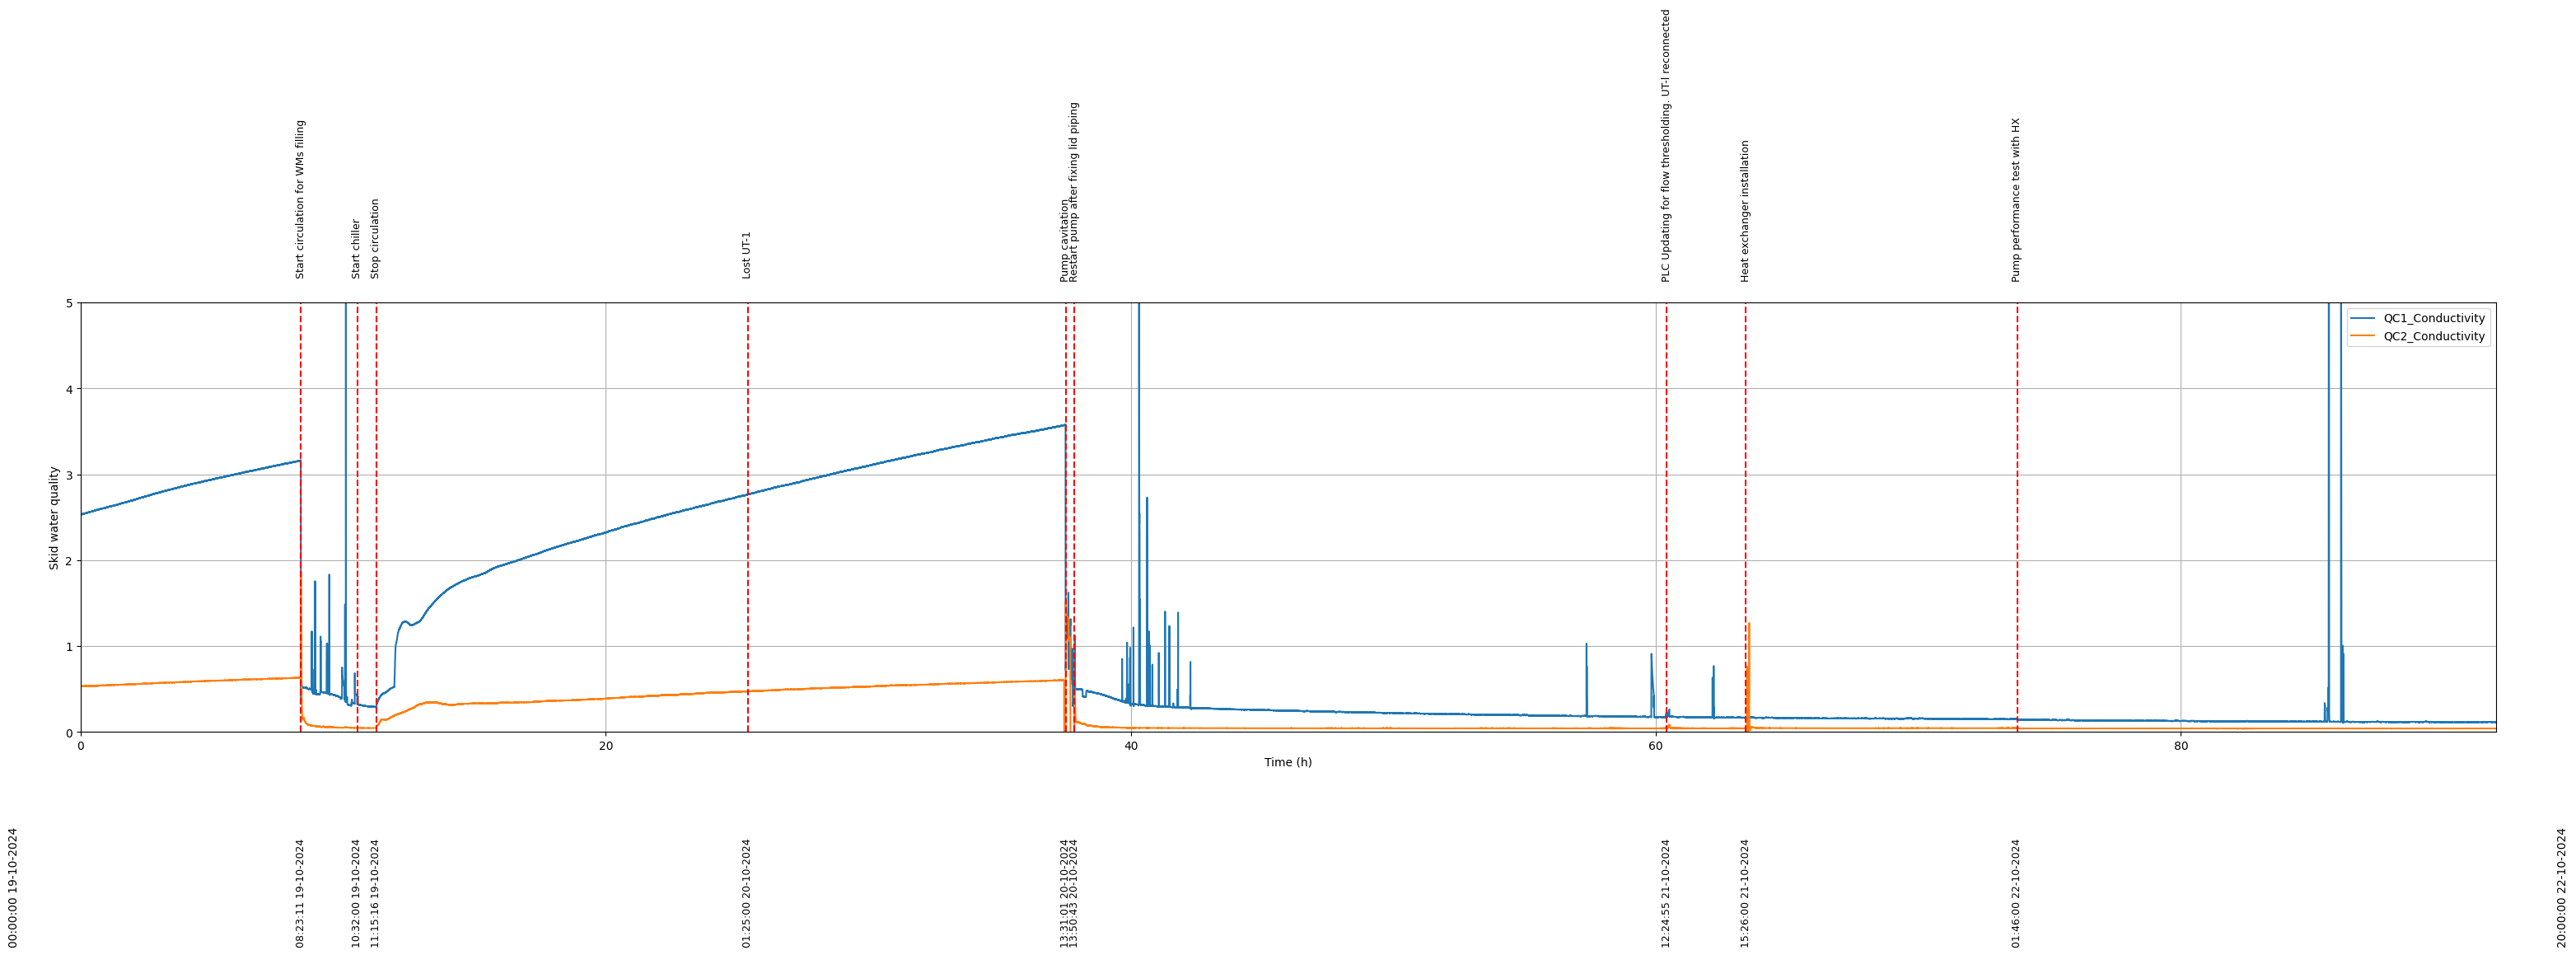

In [50]:
value_plot_range=[0,5]
plot_QC_data(data_list, columns_dict, ["00:00:00","20:00:00"], ["19-10-2024","22-10-2024"], seconds_from_start, value_plot_range, event_list)

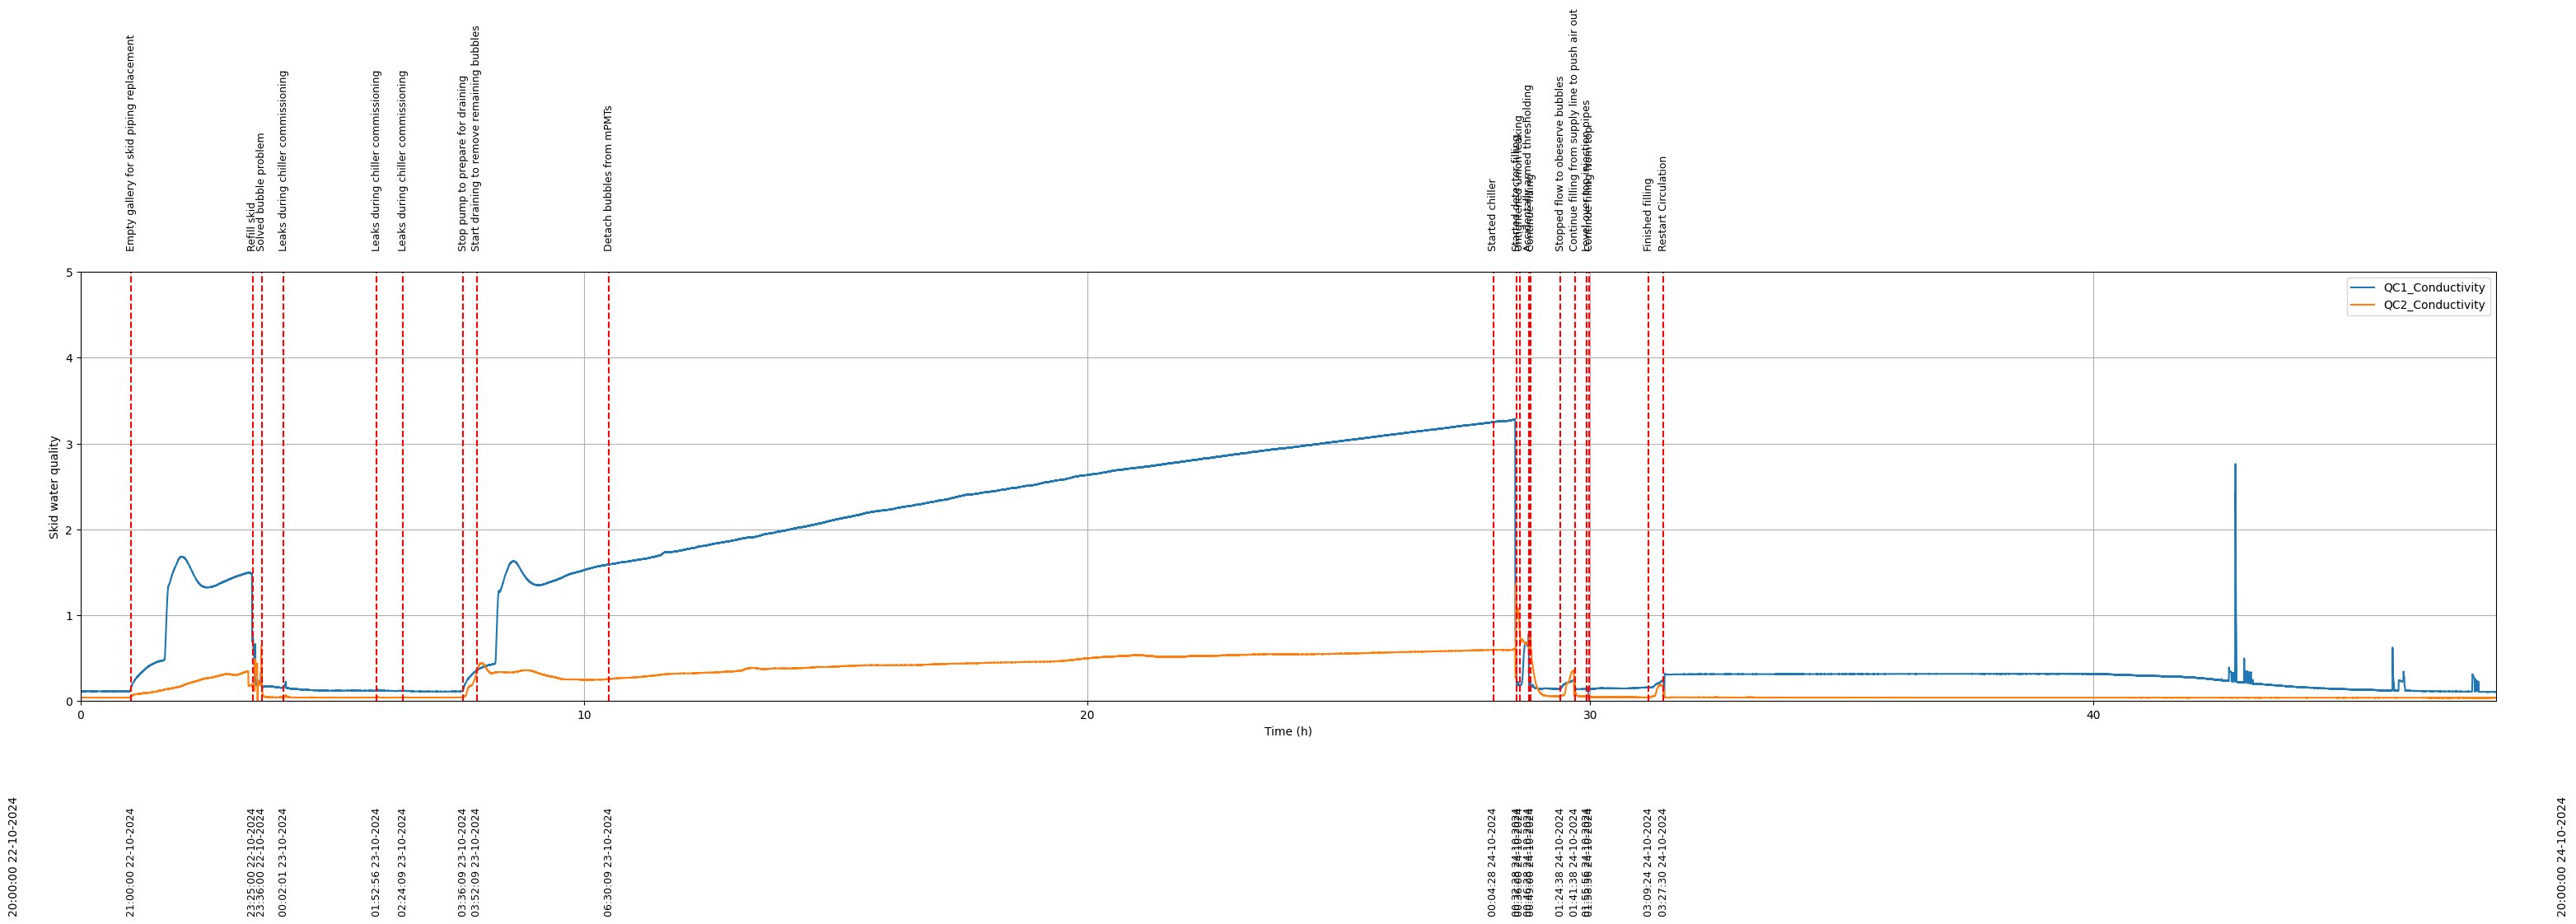

: 

In [ ]:
value_plot_range=[0,5]
plot_QC_data(data_list, columns_dict, ["20:00:00","20:00:00"], ["22-10-2024","24-10-2024"], seconds_from_start, value_plot_range, event_list)